In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DS Project/CUST_INSUR_LTV_APPLY.csv")

In [ ]:
df.head()

,MARITAL_STATUS,STATE,CREDIT_BALANCE,TIME_AS_CUSTOMER,MORTGAGE_AMOUNT,BANK_FUNDS,N_OF_DEPENDENTS,HAS_CHILDREN,SALARY,CUST_ID,...,LTV,T_AMOUNT_AUTOM_PAYMENTS,N_TRANS_TELLER,CHECKING_AMOUNT,N_TRANS_ATM,LTV_BIN,LAST,N_MORTGAGES,CAR_OWNERSHIP,FIRST
0,SINGLE,CA,0,3,0,0,3,0,65871,CU15154,...,14367.75,0,0,25,0,MEDIUM,GAYLE,0,0,DURANT
1,SINGLE,NY,0,4,0,290,4,0,68747,CU15155,...,14686.75,287,2,25,4,MEDIUM,QUINTON,0,1,MASSEY
2,MARRIED,MI,0,3,1000,550,3,0,68684,CU15157,...,25271.00,132,2,25,4,HIGH,ANIBAL,1,1,JIMENEZ
3,MARRIED,UT,0,5,1200,1000,5,0,59354,CU15286,...,19738.50,628,3,619,1,MEDIUM,JUNITA,1,1,ROBERTSON
4,MARRIED,UT,0,4,1800,0,3,0,84801,CU15287,...,31900.25,0,0,25,0,VERY HIGH,CHASITY,1,1,ELLIS


In [ ]:
df.columns

Index(['MARITAL_STATUS', 'STATE', 'CREDIT_BALANCE', 'TIME_AS_CUSTOMER',
       'MORTGAGE_AMOUNT', 'BANK_FUNDS', 'N_OF_DEPENDENTS', 'HAS_CHILDREN',
       'SALARY', 'CUST_ID', 'SEX', 'PROFESSION', 'CREDIT_CARD_LIMITS',
       'REGION', 'HOUSE_OWNERSHIP', 'N_TRANS_WEB_BANK', 'BUY_INSURANCE',
       'MONTHLY_CHECKS_WRITTEN', 'N_TRANS_KIOSK', 'AGE',
       'MONEY_MONTLY_OVERDRAWN', 'LTV', 'T_AMOUNT_AUTOM_PAYMENTS',
       'N_TRANS_TELLER', 'CHECKING_AMOUNT', 'N_TRANS_ATM', 'LTV_BIN', 'LAST',
       'N_MORTGAGES', 'CAR_OWNERSHIP', 'FIRST'],
      dtype='object')

In [ ]:
#dropping unwanted columns
df=df.drop(columns=['CUST_ID','BUY_INSURANCE','LTV_BIN','LAST','FIRST','STATE'])

In [ ]:
df.shape

(13880, 25)

In [ ]:
df.columns

Index(['MARITAL_STATUS', 'CREDIT_BALANCE', 'TIME_AS_CUSTOMER',
       'MORTGAGE_AMOUNT', 'BANK_FUNDS', 'N_OF_DEPENDENTS', 'HAS_CHILDREN',
       'SALARY', 'SEX', 'PROFESSION', 'CREDIT_CARD_LIMITS', 'REGION',
       'HOUSE_OWNERSHIP', 'N_TRANS_WEB_BANK', 'MONTHLY_CHECKS_WRITTEN',
       'N_TRANS_KIOSK', 'AGE', 'MONEY_MONTLY_OVERDRAWN', 'LTV',
       'T_AMOUNT_AUTOM_PAYMENTS', 'N_TRANS_TELLER', 'CHECKING_AMOUNT',
       'N_TRANS_ATM', 'N_MORTGAGES', 'CAR_OWNERSHIP'],
      dtype='object')

In [ ]:
#dividing categorical and quantitative features
cats=['MARITAL_STATUS','HAS_CHILDREN','SEX', 'PROFESSION','REGION',
       'HOUSE_OWNERSHIP', 'CAR_OWNERSHIP']
quants=['TIME_AS_CUSTOMER','MORTGAGE_AMOUNT', 'BANK_FUNDS', 'N_OF_DEPENDENTS', 'SALARY',
        'CREDIT_CARD_LIMITS', 'N_TRANS_WEB_BANK', 'MONTHLY_CHECKS_WRITTEN',
       'N_TRANS_KIOSK', 'AGE', 'MONEY_MONTLY_OVERDRAWN','T_AMOUNT_AUTOM_PAYMENTS', 'N_TRANS_TELLER', 'CHECKING_AMOUNT',
       'N_TRANS_ATM', 'N_MORTGAGES','CREDIT_BALANCE']
response=['LTV']

## Preprocessing

In [ ]:
df.duplicated().sum()
#no duplicates

0

In [ ]:
df.isnull().sum()
#no missing values

,0
MARITAL_STATUS,0
CREDIT_BALANCE,0
TIME_AS_CUSTOMER,0
MORTGAGE_AMOUNT,0
BANK_FUNDS,0
N_OF_DEPENDENTS,0
HAS_CHILDREN,0
SALARY,0
SEX,0
PROFESSION,0


In [ ]:
df.dtypes

,0
MARITAL_STATUS,object
CREDIT_BALANCE,int64
TIME_AS_CUSTOMER,int64
MORTGAGE_AMOUNT,int64
BANK_FUNDS,int64
N_OF_DEPENDENTS,int64
HAS_CHILDREN,int64
SALARY,int64
SEX,object
PROFESSION,object


In [ ]:
for col in cats:
    df[col] = df[col].astype('object')

In [ ]:
df.dtypes

,0
MARITAL_STATUS,object
CREDIT_BALANCE,int64
TIME_AS_CUSTOMER,int64
MORTGAGE_AMOUNT,int64
BANK_FUNDS,int64
N_OF_DEPENDENTS,int64
HAS_CHILDREN,object
SALARY,int64
SEX,object
PROFESSION,object


In [ ]:
df.describe()

,CREDIT_BALANCE,TIME_AS_CUSTOMER,MORTGAGE_AMOUNT,BANK_FUNDS,N_OF_DEPENDENTS,SALARY,CREDIT_CARD_LIMITS,N_TRANS_WEB_BANK,MONTHLY_CHECKS_WRITTEN,N_TRANS_KIOSK,AGE,MONEY_MONTLY_OVERDRAWN,LTV,T_AMOUNT_AUTOM_PAYMENTS,N_TRANS_TELLER,CHECKING_AMOUNT,N_TRANS_ATM,N_MORTGAGES
count,13880.000000,13880.000000,13880.000000,13880.000000,13880.000000,13880.000000,13880.000000,13880.000000,13880.000000,13880.000000,13880.000000,13880.000000,13880.000000,13880.00000,13880.000000,13880.000000,13880.000000,13880.000000
mean,2859.610159,2.453458,2025.546614,2610.753674,2.061023,65106.179683,1257.060519,1344.447118,4.544741,1.927378,37.440202,53.636085,22260.459312,5396.59366,1.805692,1098.546326,2.869452,0.804899
std,18485.854886,1.255292,3214.979010,4851.560625,1.550953,6663.564844,806.130952,1963.155542,4.859850,1.887093,14.604339,3.040547,6760.826722,22098.51389,1.491116,3231.151317,1.863631,0.515322
min,0.000000,1.000000,0.000000,0.000000,0.000000,37107.000000,500.000000,0.000000,0.000000,0.000000,0.000000,-77.340000,0.000000,0.00000,0.000000,25.000000,0.000000,0.000000
25%,0.000000,1.000000,112.000000,0.000000,1.000000,60719.500000,900.000000,210.000000,1.000000,1.000000,27.000000,53.060000,18615.062500,152.00000,1.000000,25.000000,1.000000,1.000000
50%,0.000000,3.000000,1100.000000,550.000000,2.000000,64426.000000,1000.000000,800.000000,3.000000,1.000000,36.000000,53.250000,23038.875000,605.00000,1.000000,25.000000,3.000000,1.000000
75%,0.000000,3.000000,2800.000000,2826.500000,3.000000,68482.000000,1500.000000,1660.000000,6.000000,3.000000,46.000000,53.810000,26099.375000,2505.50000,3.000000,272.000000,4.000000,1.000000
max,608951.000000,5.000000,90000.000000,105000.000000,6.000000,111605.000000,5000.000000,45000.000000,18.000000,10.000000,84.000000,93.640000,47501.750000,744527.00000,9.000000,24760.000000,8.000000,2.000000


In [ ]:
df.describe(include="O")

,MARITAL_STATUS,HAS_CHILDREN,SEX,PROFESSION,REGION,HOUSE_OWNERSHIP,CAR_OWNERSHIP
count,13880,13880,13880,13880,13880,13880,13880
unique,5,2,2,100,5,3,2
top,SINGLE,0,M,Programmer/Developer,NorthEast,1,1
freq,4856,6940,9462,2221,4948,9667,12926


In [ ]:
#Checking unique values in each variables with thier count percentage
for i in cats:
  print(i)
  print(df[i].value_counts(normalize=True))

MARITAL_STATUS
MARITAL_STATUS
SINGLE      0.349856
MARRIED     0.342147
DIVORCED    0.255476
WIDOWED     0.043732
OTHER       0.008790
Name: proportion, dtype: float64
HAS_CHILDREN
HAS_CHILDREN
0    0.5
1    0.5
Name: proportion, dtype: float64
SEX
SEX
M    0.6817
F    0.3183
Name: proportion, dtype: float64
PROFESSION
PROFESSION
Programmer/Developer    0.160014
IT Staff                0.078386
Clerical                0.040778
Nurse                   0.040130
Not specified           0.031124
                          ...   
PROF-63                 0.001225
PROF-64                 0.001153
PROF-65                 0.001153
PROF-67                 0.001081
PROF-66                 0.001009
Name: proportion, Length: 100, dtype: float64
REGION
REGION
NorthEast    0.356484
West         0.283141
Midwest      0.217435
South        0.075432
Southwest    0.067507
Name: proportion, dtype: float64
HOUSE_OWNERSHIP
HOUSE_OWNERSHIP
1    0.696470
0    0.249207
2    0.054323
Name: proportion, dtype: flo

In [ ]:
#profession has lots of numbers of categories, lower amount catgories encoded to others
#catogories of occurance less tha 400 humdrand in PROFESSION column recode as other
categories_to_recode = df['PROFESSION'].value_counts()[df['PROFESSION'].value_counts() < 400].index
df['PROFESSION'] = df['PROFESSION'].replace(categories_to_recode, 'Other')
df['PROFESSION'].value_counts()

,count
PROFESSION,
Other,7341
Programmer/Developer,2221
IT Staff,1088
Clerical,566
Nurse,557
Not specified,432
Cashier,421
Author,421
Waiter/Waitress,419


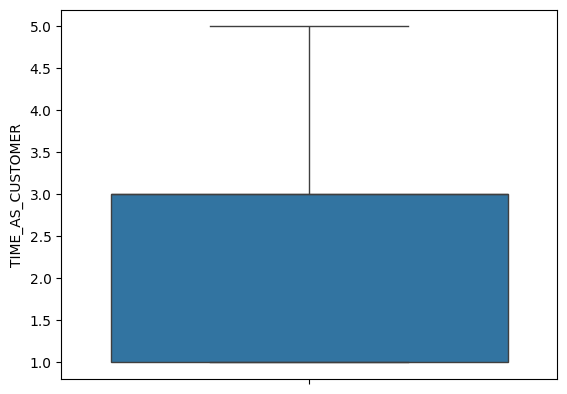

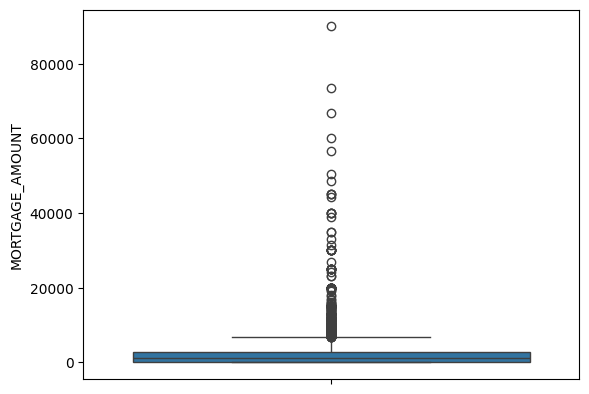

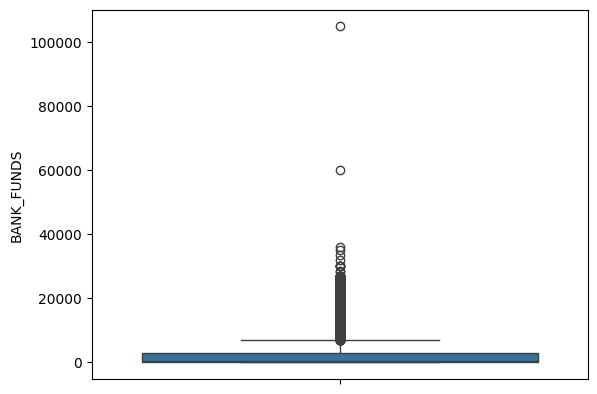

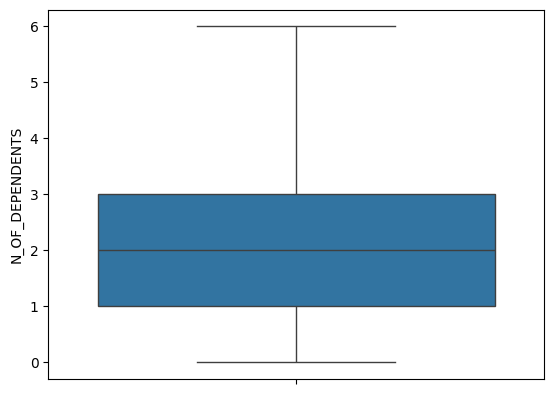

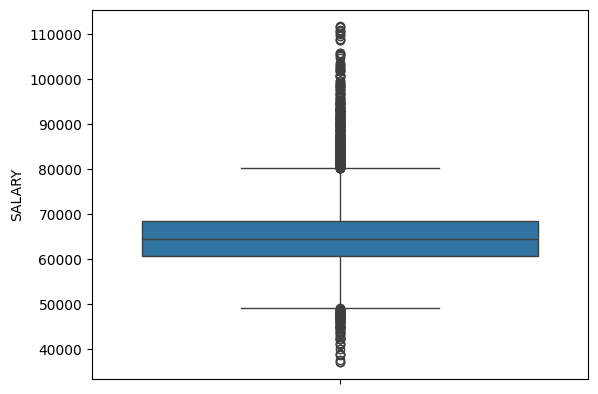

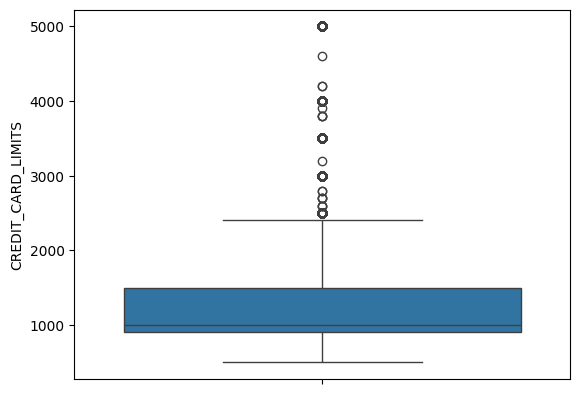

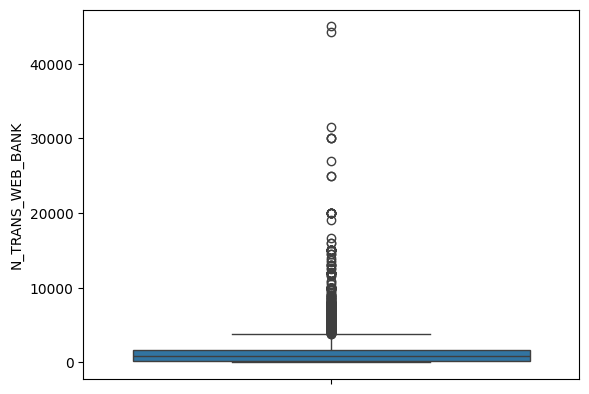

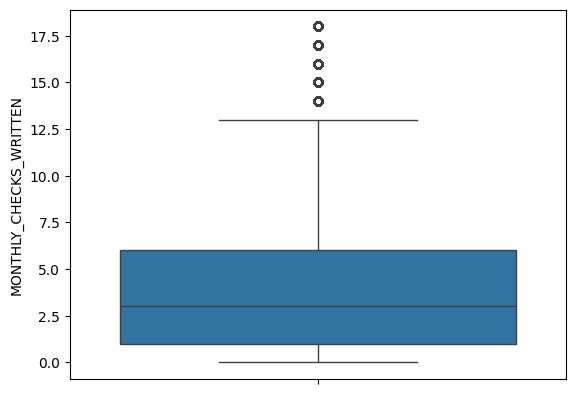

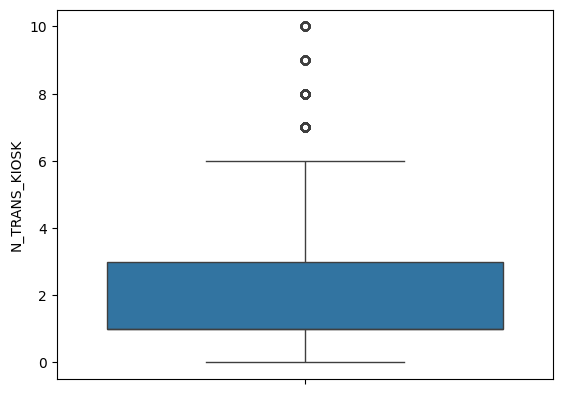

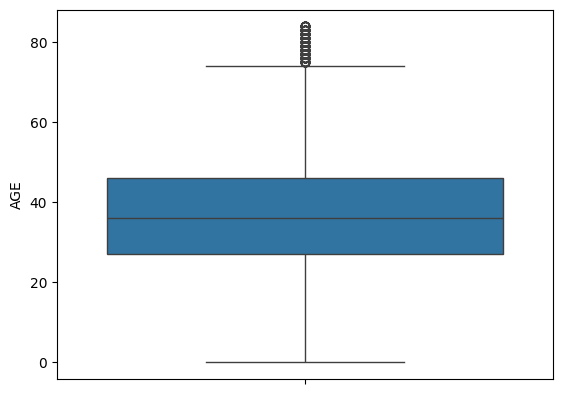

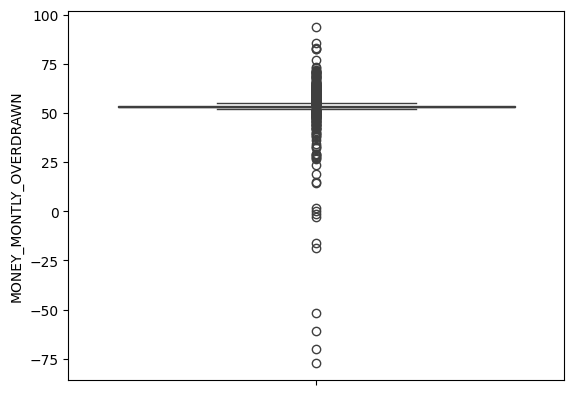

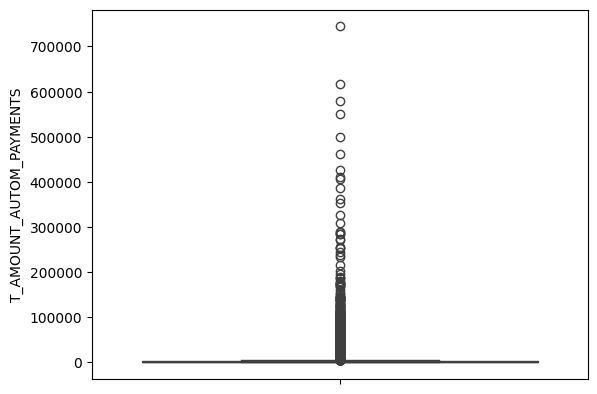

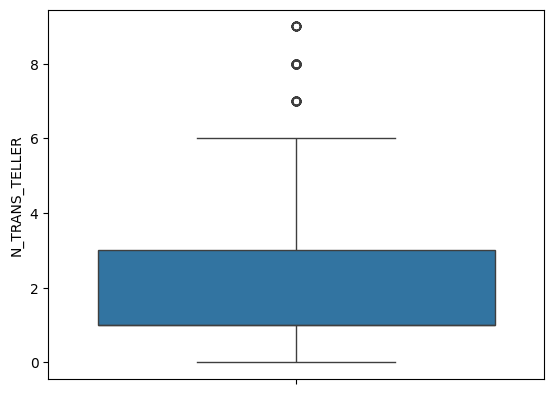

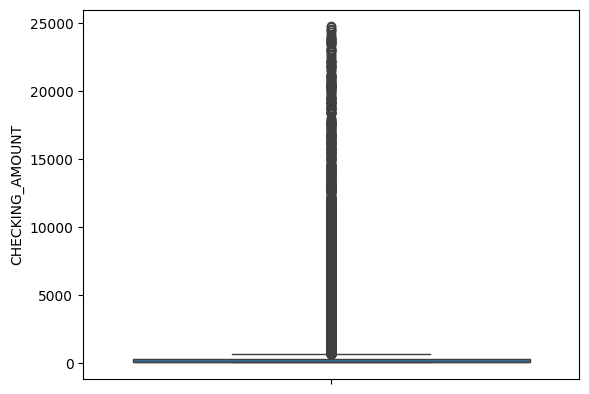

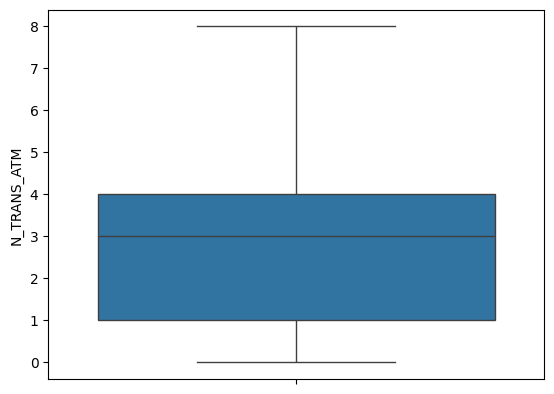

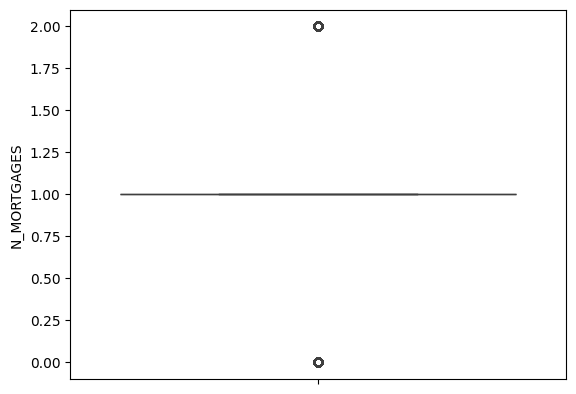

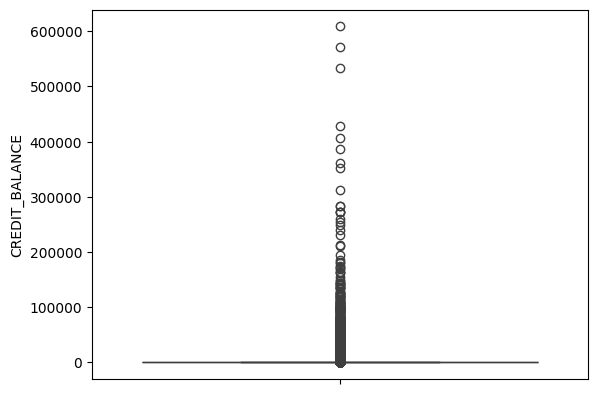

In [ ]:
#plotting individual box plot on categorical variables to initial checkinh of outliers
for i in quants:
  sns.boxplot(df[i])
  plt.show()

## Multivariate Outlier detection for Mix Data

In [ ]:
#Create copy of df without the outcome variable
df_copy=df.copy()
df_copy=df_copy.drop(['LTV'], axis=1)

In [ ]:
!pip install gower

In [ ]:
import gower

# Calculate the Gower distance matrix
gower_dist = gower.gower_matrix(df_copy)

# k= No.of dimensions * 2
k = 48


In [ ]:
from sklearn.neighbors import NearestNeighbors
# Use NearestNeighbors with precomputed distance
neighbors = NearestNeighbors(n_neighbors=k, metric='precomputed')
neighbors_fit = neighbors.fit(gower_dist)
distances, indices = neighbors_fit.kneighbors(gower_dist)

# Sort distances to the k-th nearest neighbor
distances = np.sort(distances[:, k-1], axis=0)

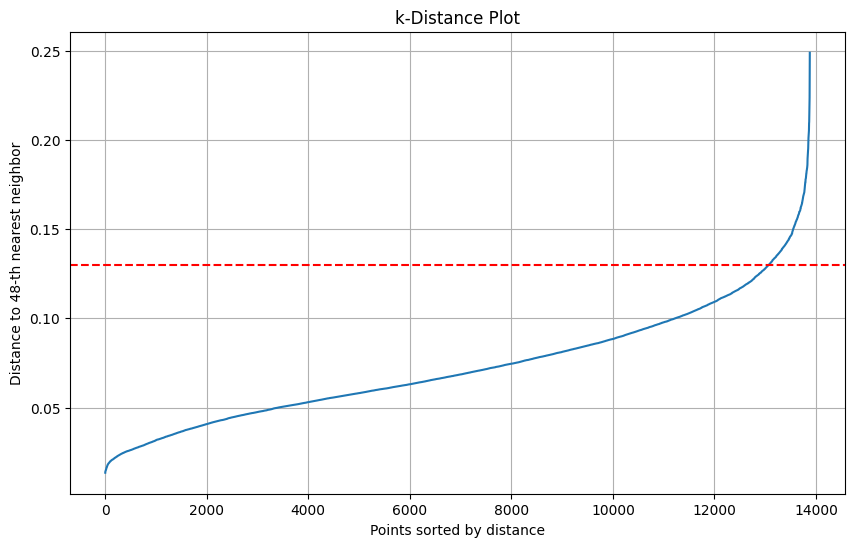

In [ ]:
# Plot the k-distance graph
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('k-Distance Plot')
plt.xlabel('Points sorted by distance')
plt.ylabel('Distance to {}-th nearest neighbor'.format(k))
plt.axhline(y=0.13, color='r', linestyle='--')  # Add a horizontal line at the chosen epsilon
plt.grid(True)
plt.show()

eps= 0.13 , min_samples= No. of dimensions * 2

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.13, min_samples=48,metric='precomputed')
dbscan.fit(gower_dist)

DBSCAN(eps=0.13, metric='precomputed', min_samples=48)

In [ ]:
labels = dbscan.labels_
num_outliers = np.sum(labels == -1)

print("Number of outliers detected:", num_outliers)

Number of outliers detected: 83


In [ ]:
print("Percentage of outliers:", np.sum(labels == -1) / len(labels) * 100)

Percentage of outliers: 0.5979827089337175


Less than 1% of data detected as outlier so remove them

In [ ]:
noise_indexes = df[labels == -1].index.tolist()

In [ ]:
noise_indexes

[51,
 344,
 426,
 428,
 513,
 540,
 713,
 859,
 947,
 1256,
 1556,
 1621,
 1622,
 1639,
 1802,
 1807,
 1940,
 1980,
 2241,
 2415,
 2519,
 2746,
 2749,
 2805,
 2910,
 3359,
 3495,
 3686,
 4097,
 4279,
 4321,
 4365,
 4404,
 4467,
 5177,
 5386,
 5478,
 5484,
 5537,
 5607,
 5712,
 5750,
 5925,
 5944,
 6002,
 6045,
 6074,
 6232,
 6310,
 6332,
 6678,
 6706,
 6731,
 7026,
 7114,
 7185,
 7888,
 7898,
 7930,
 8418,
 8497,
 8602,
 8729,
 8951,
 9102,
 9433,
 9443,
 9450,
 9453,
 9458,
 9488,
 9550,
 10609,
 10758,
 11409,
 11625,
 11626,
 12036,
 12466,
 13287,
 13323,
 13360,
 13777]

In [ ]:
a=[51,344,426,428,513,540,713,859,947,1256,1556,1621,1622,1639,1802,1807,1940,1980,2241,2415,2519, 2746,2749,2805,2910,3359,3495,3686,4097,4279,4321,4365,4404,4467,5177,5386,
 5478,5484,5537,5607,5712,5750,5925,5944,6002,6045,6074,6232,6310,6332,6678,6706,6731,7026,7114,7185,7888,7898,7930,8418,8497,8602,8729,8951,9102,9433,9443,9450,9453,
 9458,9488,9550,10609,10758,11409,11625,11626,12036,12466,13287,13323,13360,13777]

In [ ]:
#removing noicy data from the system
# Remove outliers from the dataframe
df = df.drop(df[labels == -1].index)

In [ ]:
#remove rows of df with index in equals to list a
df = df.drop(a)

In [ ]:
df.shape

(13797, 25)

## Train test split

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, random_state=100)

In [ ]:
df_train.shape

(11037, 25)

## EDA

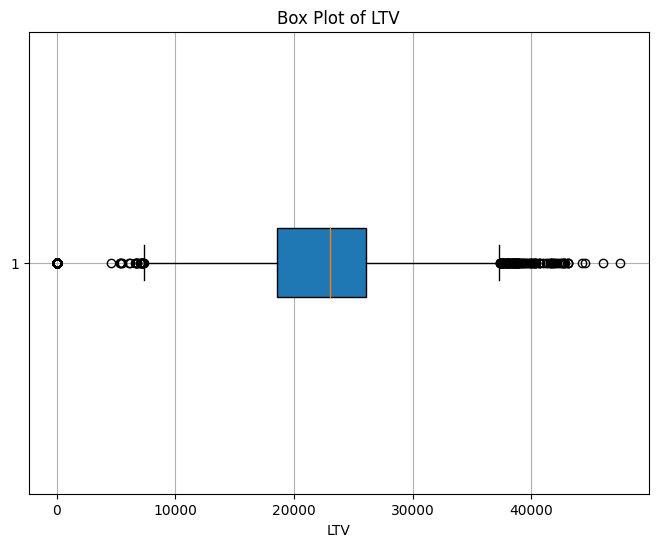

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_train['LTV'], vert=False, patch_artist=True)
plt.title('Box Plot of LTV')
plt.xlabel('LTV')
plt.grid(True)
plt.show()

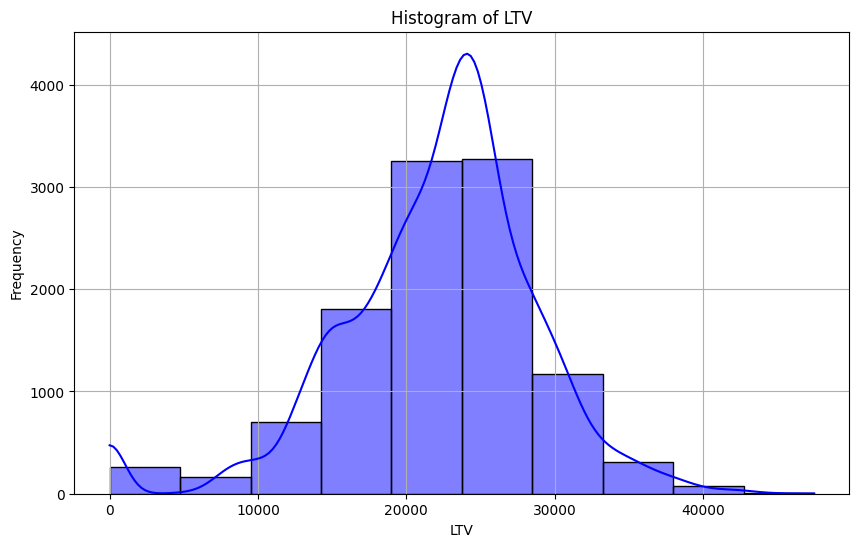

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['LTV'], bins=10, kde=True, color='blue')
plt.title('Histogram of LTV')
plt.xlabel('LTV')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
#response variable is approximately normally distributed

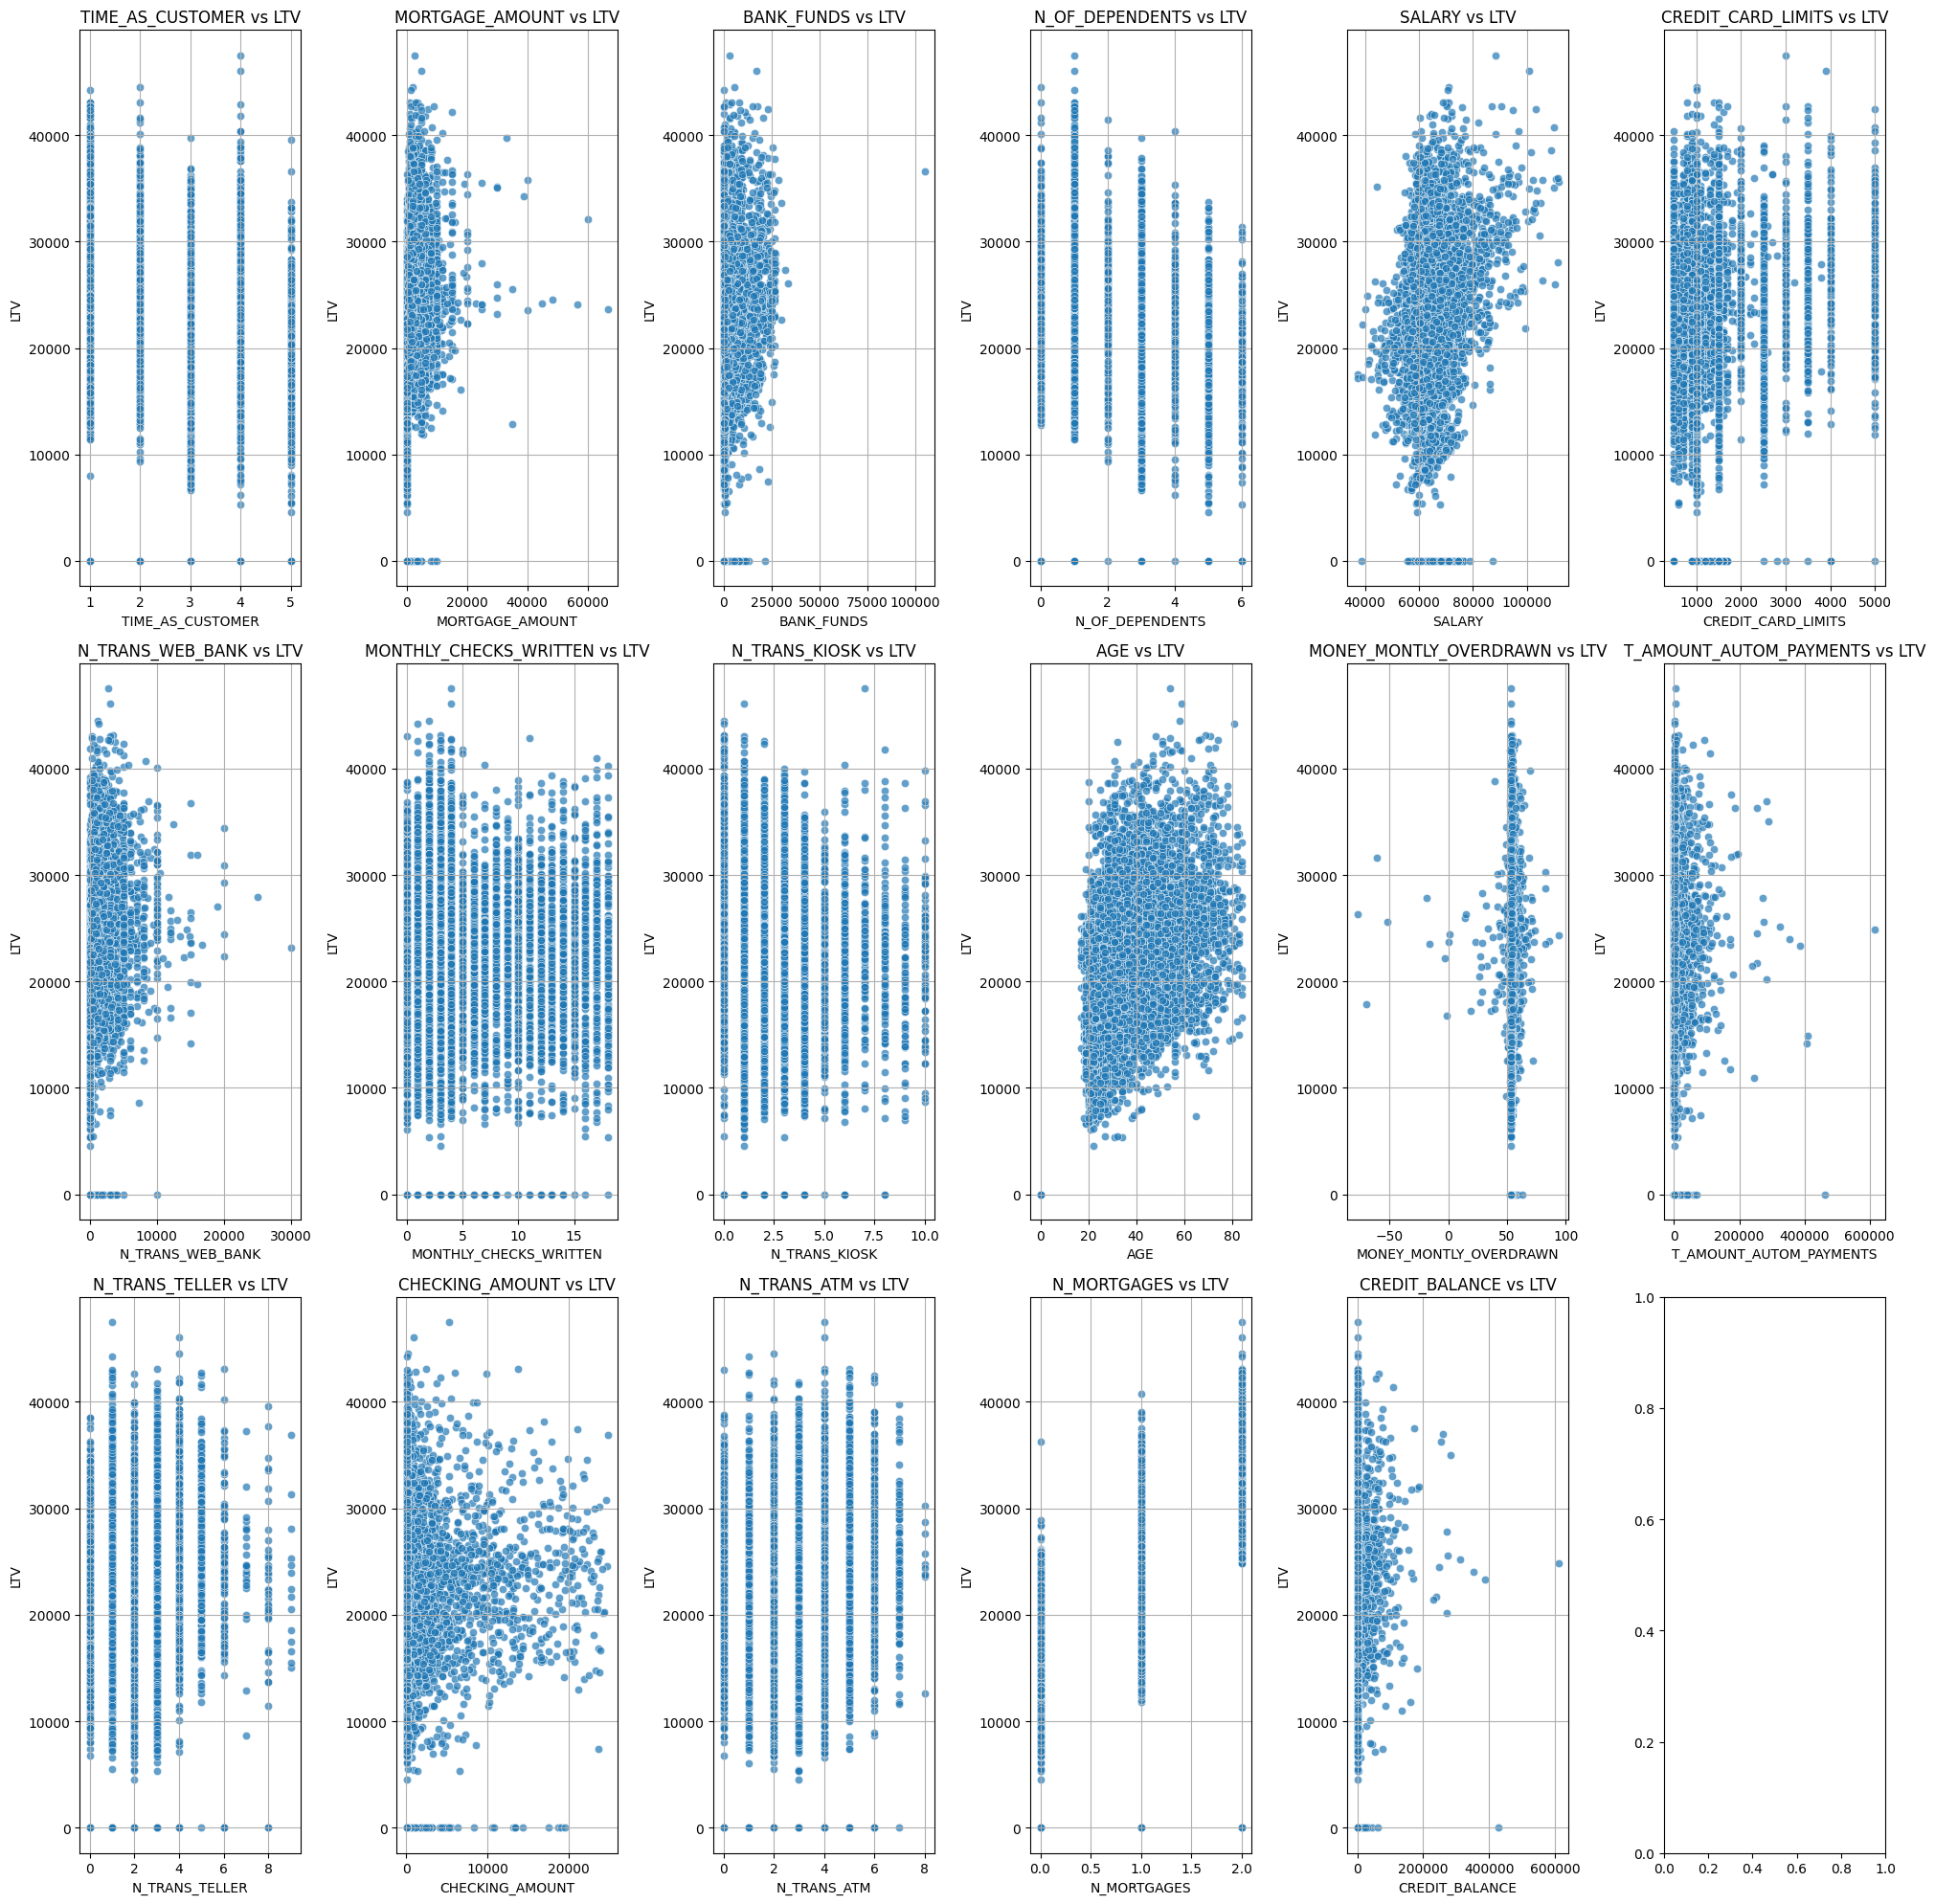

In [ ]:
#scatter plot for quantitative response and quantitative features
num_features = len(quants)
grid_size = 4
fig, axes = plt.subplots(3, 6, figsize=(20, 20))
axes = axes.flatten()

for i, feature in enumerate(quants):
    if i < len(axes):
        sns.scatterplot(x=df_train[feature], y=df_train['LTV'], ax=axes[i], alpha=0.7)
        axes[i].set_title(f'{feature} vs LTV')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('LTV')
        axes[i].grid(True)

plt.tight_layout()
plt.show()

<ipython-input-46-e33a559af95e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[feature], y=df_train['LTV'], ax=axes[i], palette='Set2')
<ipython-input-46-e33a559af95e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[feature], y=df_train['LTV'], ax=axes[i], palette='Set2')
<ipython-input-46-e33a559af95e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train[feature], y=df_train['LTV'], ax=axes[i], palette='Set2')
<ipython-input-46-e33a559af95e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is dep

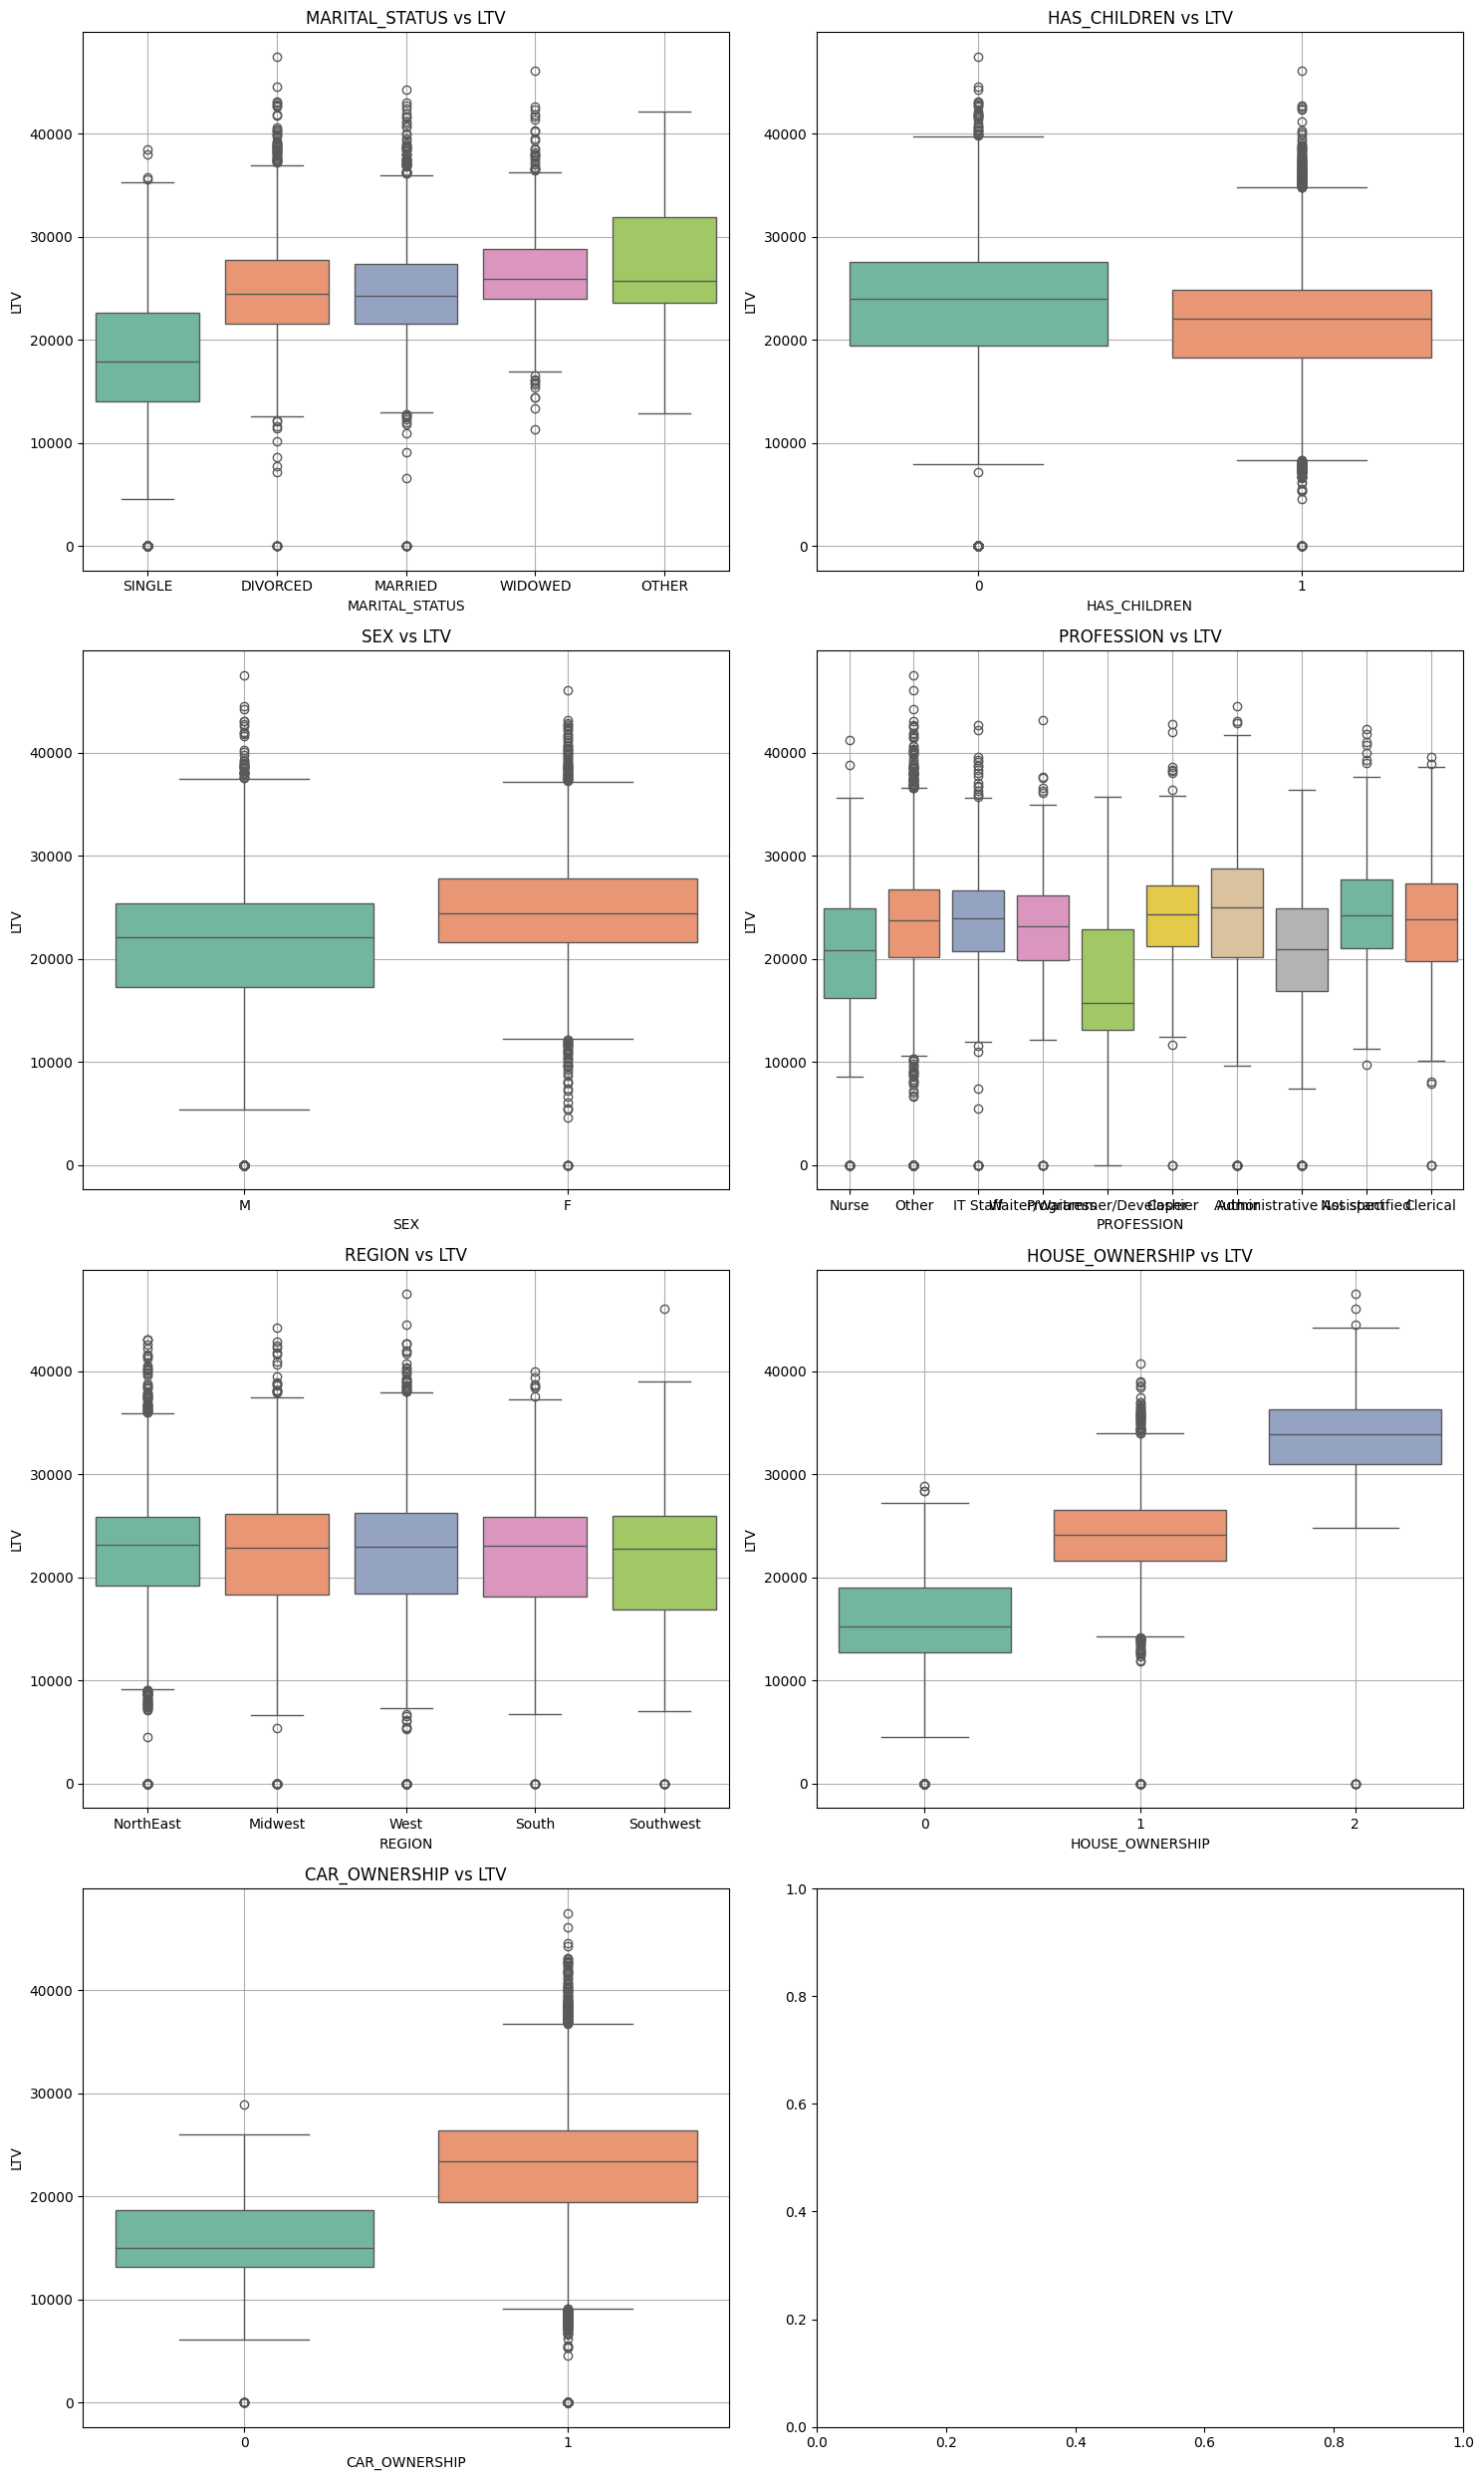

In [ ]:
#side by side box plot categorical features and LTV
# Create a 3x3 grid for box plots
fig, axes = plt.subplots(4,2, figsize=(15,25))
axes = axes.flatten()

# Plot each categorical feature
for i, feature in enumerate(cats):
    if i < len(axes):
        sns.boxplot(x=df_train[feature], y=df_train['LTV'], ax=axes[i], palette='Set2')
        axes[i].set_title(f'{feature} vs LTV')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('LTV')
        axes[i].grid(True)

plt.tight_layout()
plt.show()

<Axes: >

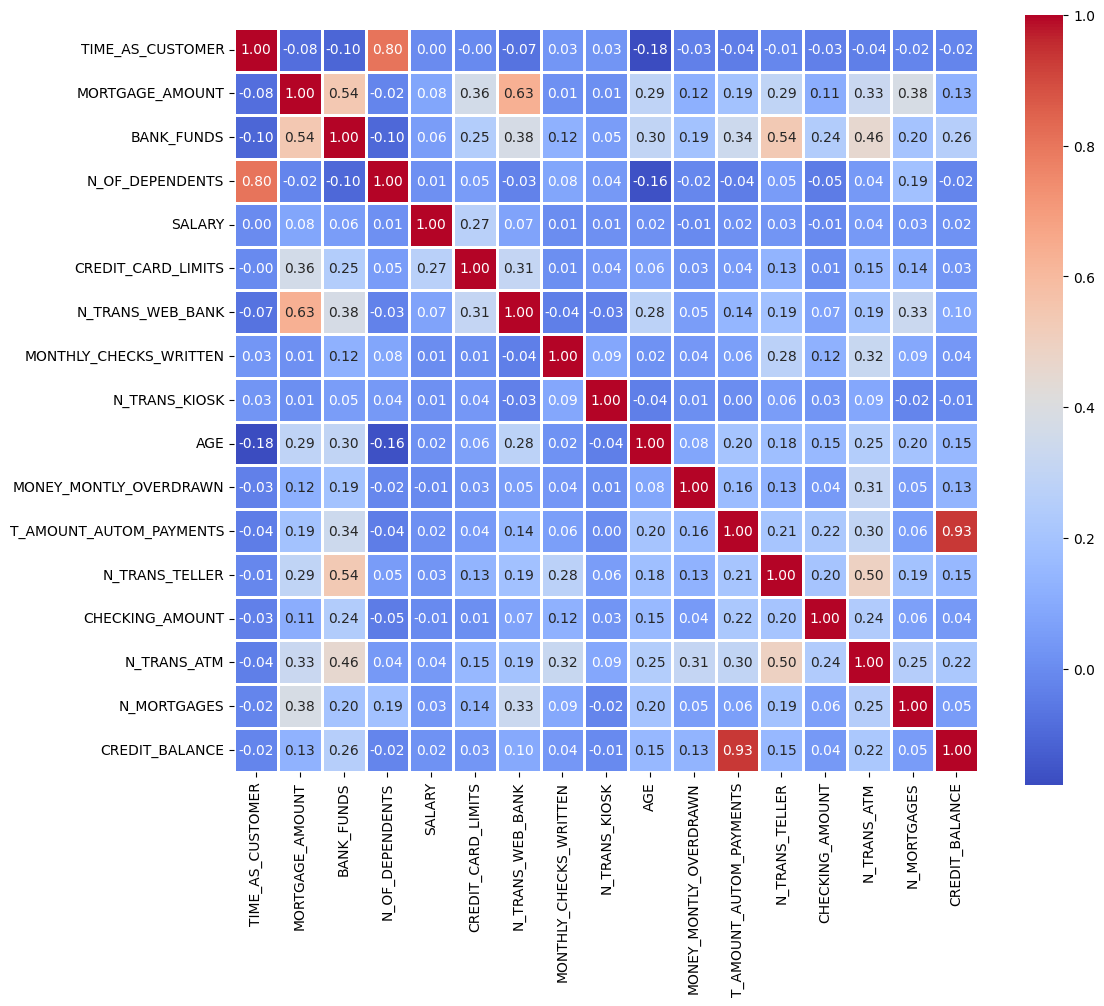

In [ ]:
#correlation heatmap of quantitative features
corr_matrix = df_train[quants].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.8, square=True)

<Axes: >

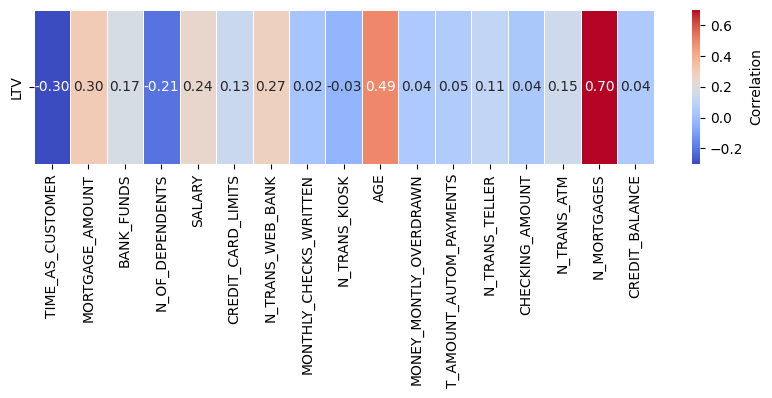

In [ ]:
#response with quantitative features
corr_with_LTV = df_train[quants + ['LTV']].corr()['LTV'].drop('LTV')
corr_matrix = pd.DataFrame(corr_with_LTV).transpose()
plt.figure(figsize=(10, 2))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Correlation'})

<ipython-input-49-a50f5679f9de>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_stat = anova_table['F'][0]
<ipython-input-49-a50f5679f9de>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
<ipython-input-49-a50f5679f9de>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f_stat = anova_table['F'][0]
<ipython-input-49-a50f5679f9de>:10: FutureWarning: Series.__getitem__ treating keys as positions is

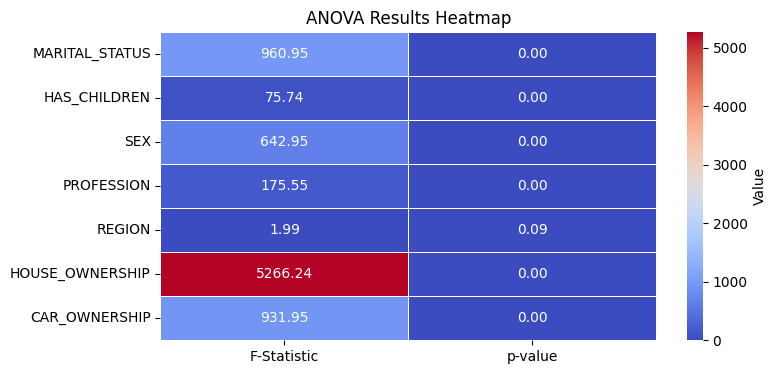

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

anova_results = pd.DataFrame(index=cats, columns=['F-Statistic', 'p-value'])

for cat in cats:
    model = ols(f'LTV ~ C({cat})', data=df_train).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    f_stat = anova_table['F'][0]
    p_value = anova_table['PR(>F)'][0]
    anova_results.loc[cat] = [f_stat, p_value]

anova_results = anova_results.astype(float)

plt.figure(figsize=(8, 4))
sns.heatmap(anova_results, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Value'})
plt.title('ANOVA Results Heatmap')
plt.show()

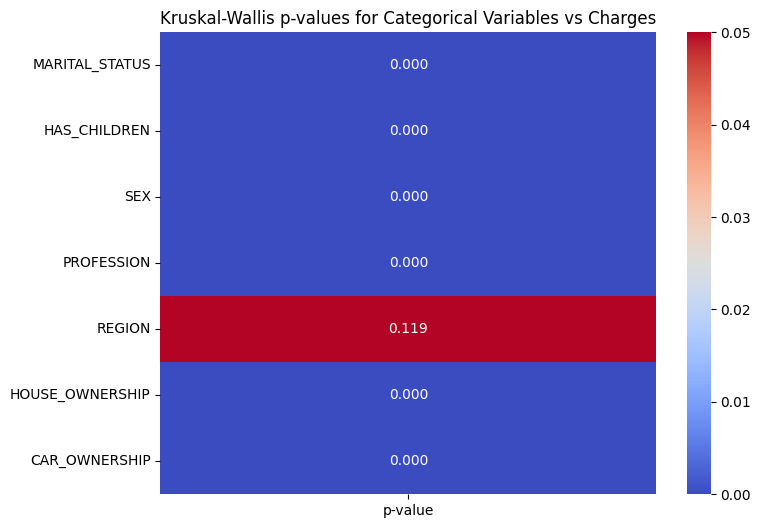

In [ ]:
from scipy.stats import kruskal

def calculate_kruskal_wallis(var):
    groups = []
    for group_name, group_data in df_train.groupby(var)['LTV']:
        groups.append(group_data)
    h_val, p_val = kruskal(*groups)
    return h_val, p_val

kruskal_results = {}
for var in cats:
    h_val, p_val = calculate_kruskal_wallis(var)
    kruskal_results[var] = {'H-statistic': h_val, 'p-value': p_val}

results_df = pd.DataFrame(kruskal_results).T
plt.figure(figsize=(8, 6))
sns.heatmap(results_df[['p-value']], annot=True, cmap='coolwarm', vmin=0, vmax=0.05, fmt=".3f")
plt.title('Kruskal-Wallis p-values for Categorical Variables vs Charges')
plt.show()

## Cluster Checking

### FAMD

In [ ]:
!pip install prince

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.8/415.8 kB 7.4 MB/s eta 0:00:00


In [ ]:
import prince
famd = prince.FAMD(
    n_components=80,
    n_iter=20,
    copy=True,
    check_input=True,
    random_state=123,
    engine="sklearn",
    handle_unknown="error"
)

In [ ]:
famd = famd.fit(df_train)

/usr/local/lib/python3.10/dist-packages/prince/pca.py:178: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.5214871994185282, -0.11181859265081216, -0.16139623641837877, -0.33700523551849315, -0.4610398684072133, -0.5646562143387875, -0.6431594457556178, -0.6158487875225952, -0.6133056983898394, -0.6141545648146314, -0.5943239722264562, -0.5908072314572924, -0.5534737958828787, -0.5637328184399149, -0.5234814216070911, -0.5819224060733732, -0.5664984907321573, -0.568334795355883, -0.5600240096329864, -0.5515880193755128, -0.5372337443241915, -0.5204872230441195, -0.5382026066880311, -0.5333406948844125, -0.5124171649257796, -0.5021472422094606, -0.4744061107567532, -0.49166284668109683, -0.4484376349100651, -0.45190946197146065, -0.43186689515511983, -0.4221059306493072, -0.3860036556092422, -0.36945287180003117, -0.34615636293166585, -0.29934542463057495, -0.3096116633437173, -0.319548245042384, -0.326004417348094, -0.27006755888860146, -0.27198977217764

In [ ]:
famd.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,112.224,0.05%,0.05%
1,80.959,0.03%,0.08%
2,79.163,0.03%,0.12%
3,75.296,0.03%,0.15%
4,73.484,0.03%,0.18%
5,71.722,0.03%,0.21%
6,69.784,0.03%,0.24%
7,69.492,0.03%,0.27%
8,69.374,0.03%,0.30%


In [ ]:
transformed_df = famd.transform(df_train)

/usr/local/lib/python3.10/dist-packages/prince/pca.py:178: PerformanceWarning: Concatenating sparse arrays with multiple fill values: '[-0.5214871994185282, -0.11181859265081216, -0.16139623641837877, -0.33700523551849315, -0.4610398684072133, -0.5646562143387875, -0.6431594457556178, -0.6158487875225952, -0.6133056983898394, -0.6141545648146314, -0.5943239722264562, -0.5908072314572924, -0.5534737958828787, -0.5637328184399149, -0.5234814216070911, -0.5819224060733732, -0.5664984907321573, -0.568334795355883, -0.5600240096329864, -0.5515880193755128, -0.5372337443241915, -0.5204872230441195, -0.5382026066880311, -0.5333406948844125, -0.5124171649257796, -0.5021472422094606, -0.4744061107567532, -0.49166284668109683, -0.4484376349100651, -0.45190946197146065, -0.43186689515511983, -0.4221059306493072, -0.3860036556092422, -0.36945287180003117, -0.34615636293166585, -0.29934542463057495, -0.3096116633437173, -0.319548245042384, -0.326004417348094, -0.27006755888860146, -0.27198977217764

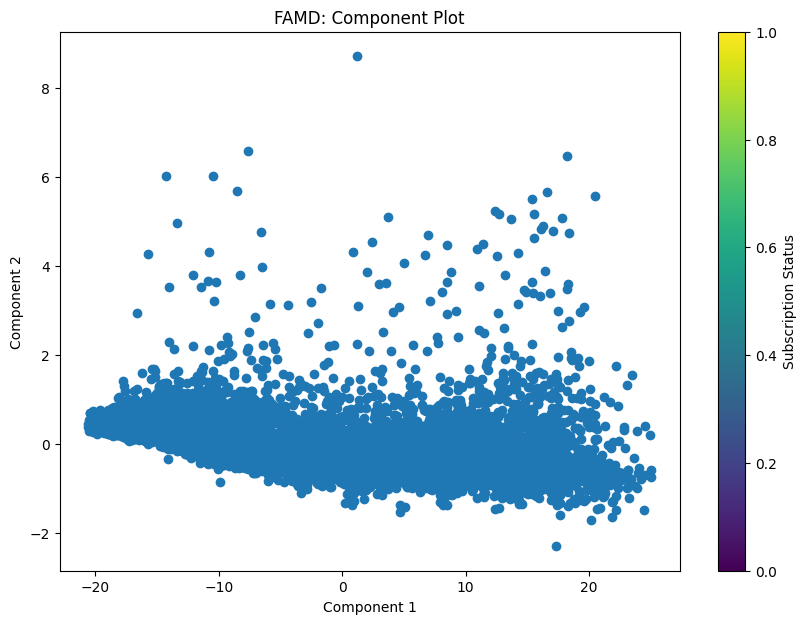

In [ ]:
from scipy import stats
z_scores = np.abs(stats.zscore(transformed_df))
threshold = 3
non_outliers = (z_scores < threshold).all(axis=1)
cleaned_df = transformed_df[non_outliers]
plt.figure(figsize=(10, 7))
plt.scatter(cleaned_df .iloc[:, 0], cleaned_df .iloc[:, 1])
plt.colorbar(label='Subscription Status')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('FAMD: Component Plot')
plt.show()

In [ ]:
#No clusters visully seen

### DBSCAN with Gower Distance

In [ ]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 83


No cluster as of DBSCAN algorithm with gower

## Model Fitting

In [ ]:
X_train=df_train.drop(columns=['LTV'])
X_test=df_test.drop(columns=['LTV'])
y_train=df_train['LTV']
y_test=df_test['LTV']


In [ ]:
#scaling adn encodeing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse=False))
])

quantitative_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cats),
        ('num', quantitative_transformer, quants)
    ]
)



In [ ]:
X_train_transformed = preprocessor.fit_transform(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_test_transformed = preprocessor.fit_transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### MLR

In [ ]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train_transformed).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    LTV   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          2.830e+04
Date:                Tue, 17 Sep 2024   Prob (F-statistic):                        0.00
Time:                        12:35:38   Log-Likelihood:                     -1.0111e+05
No. Observations:               11037   AIC:                                  2.023e+05
Df Residuals:                   10998   BIC:                                  2.026e+05
Df Model:                          39                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           383.5028     60.022      6.389      0.000     265.849     501.157
x2          -373.0272    325.310     -1.147      0.252   -1010.694     264.640
x3           618.8003     95.498      6.480      0.000     431.607     805.993
x4         -1295.2660    133.833     -9.678      0.000   -1557.602   -1032.930
x5         -4786.4148     50.466    -94.845      0.000   -4885.336   -4687.493
x6           354.1072     58.626      6.040      0.000     239.190     469.024
x7         -1982.4654    182.948    -10.836      0.000   -2341.077   -1623.854
x8           852.6819    179.573      4.748      0.000     500.686    1204.678
x9          1211.1053    173.444      6.983      0.000     871.125    1551.086
x10         1121.2780    152.684      7.344      0.000     821.990    1420.566
x11         1412.2067    180.943      7.805      0.000    1057.526    1766.888
x12          597.4820    166.210      3.595      0.000     271.681     923.283
x13         1139.1384    131.327      8.674      0.000     881.714    1396.563
x14         2619.6586    145.752     17.973      0.000    2333.958    2905.359
x15         1618.8669    181.032      8.942      0.000    1264.012    1973.722
x16          151.1027     60.010      2.518      0.012      33.472     268.733
x17          148.9236     93.565      1.592      0.111     -34.481     332.328
x18          104.2982     98.140      1.063      0.288     -88.074     296.670
x19         -135.4689     63.402     -2.137      0.033    -259.749     -11.189
x20         2.981e+04    221.490    134.609      0.000    2.94e+04    3.02e+04
x21          5.82e+04    445.396    130.665      0.000    5.73e+04    5.91e+04
x22        -1058.2961    102.411    -10.334      0.000   -1259.041    -857.552
x23          479.4452     40.435     11.857      0.000     400.185     558.706
x24          -12.8089     38.654     -0.331      0.740     -88.577      62.959
x25          -39.8077     33.707     -1.181      0.238    -105.879      26.264
x26        -2672.9117     44.051    -60.678      0.000   -2759.260   -2586.564
x27         1560.4095     22.811     68.407      0.000    1515.696    1605.123
x28          -14.1080     25.199     -0.560      0.576     -63.503      35.287
x29            6.9645     30.367      0.229      0.819     -52.560      66.489
x30           94.0065     24.109      3.899      0.000      46.748     141.265
x31           81.2117     22.380      3.629      0.000      37.342     125.081
x32         3100.0243     27.338    113.396      0.000    3046.437    3153.612
x33          -24.3710     23.391     -1.042      0.297     -70.221      21.479
x34         -437.2561     73.708     -5.932      0.000    -581.738    -292.774
x35            2.9853     29.060      0.103      0.918     -5

In [ ]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(X_train_transformed,y_train)

LinearRegression()

In [ ]:
#traing performance
from sklearn.metrics import mean_squared_error, r2_score
y_pred_train_lr=model_lr.predict(X_train_transformed)
MSE_lr=mean_squared_error(y_train,y_pred_train_lr)
r_lr= r2_score(y_train,y_pred_train_lr)
MSE_lr,r_lr

(5191653.844055869, 0.8849916690721907)

In [ ]:
#test performance
from sklearn.metrics import mean_squared_error, r2_score
y_pred_test_lr=model_lr.predict(X_test_transformed)
MSE_lr_test=mean_squared_error(y_test,y_pred_test_lr)
r_lr_test= r2_score(y_test,y_pred_test_lr)
MSE_lr_test,r_lr_test

(5407873.161273859, 0.8776391308663252)

In [ ]:
#model coefficients
print(f"Intercept: {model_lr.intercept_}")
print(f"Coefficients: {model_lr.coef_}")


Intercept: 14425.233701293942
Coefficients: [ 3.37260360e+02 -3.85255799e+02  4.95191582e+02 -1.33296021e+03
 -4.80721707e+03  3.39309030e+02 -2.15592723e+03  5.91319113e+02
  9.41135317e+02  8.45739804e+02  1.13246180e+03  3.57071680e+02
  8.70838956e+02  2.36726629e+03  1.36930973e+03  1.13208161e+02
  1.12720748e+02  6.77329988e+01 -1.63780536e+02  1.23625649e+04
  2.33827582e+04 -1.18422365e+03  4.68762148e+02 -3.24769321e+01
 -3.94518336e+01 -2.65748912e+03  1.56034022e+03 -1.23968016e+01
  1.05604342e+01  9.70581352e+01  8.23189132e+01  3.09541600e+03
 -2.25255064e+01 -2.63635166e+02 -2.30049463e+00 -5.78362767e+01
  9.01428224e+01 -6.14931640e+02  1.36826500e+02]


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = X_train[quants].columns
vif_data['VIF'] = [variance_inflation_factor(X_train[quants].values, i) for i in range(X_train[quants].shape[1])]

print("\nVariance Inflation Factor (VIF) for Each Predictor:")
print(vif_data)


Variance Inflation Factor (VIF) for Each Predictor:
                    feature        VIF
0          TIME_AS_CUSTOMER  14.781676
1           MORTGAGE_AMOUNT   3.285535
2                BANK_FUNDS   2.673292
3           N_OF_DEPENDENTS   9.119724
4                    SALARY  80.897564
5        CREDIT_CARD_LIMITS   4.443698
6          N_TRANS_WEB_BANK   2.734084
7    MONTHLY_CHECKS_WRITTEN   2.201946
8             N_TRANS_KIOSK   2.092751
9                       AGE   9.195034
10   MONEY_MONTLY_OVERDRAWN  85.822336
11  T_AMOUNT_AUTOM_PAYMENTS  11.962492
12           N_TRANS_TELLER   4.091421
13          CHECKING_AMOUNT   1.543257
14              N_TRANS_ATM   5.724732
15              N_MORTGAGES   4.773407
16           CREDIT_BALANCE  10.471833


In [ ]:
residuals = y_train - y_pred_train_lr

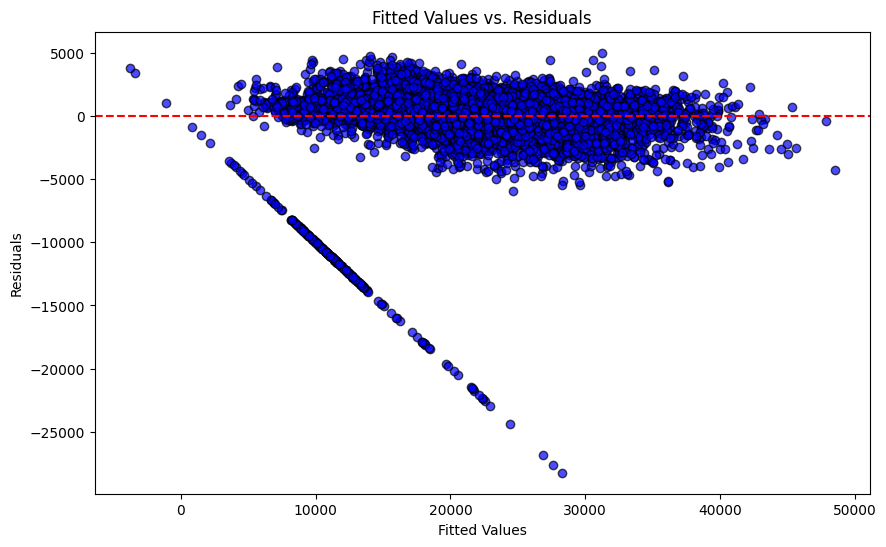

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_train_lr, residuals, color='blue', edgecolor='k', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted Values vs. Residuals')
plt.show()

we can see the assumption for the regression been violated and also VIF is high, so next up with shrinkage methods

### Shrinkage methods

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV


# Define parameter grids for each model
param_grid_ridge = {'alpha': [0.1, 1, 10, 100]}
param_grid_lasso = {'alpha': [0.1, 1, 10, 100]}
param_grid_elasticnet = {'alpha': [0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.9]}

ridge = Ridge()
lasso = Lasso()
elasticnet = ElasticNet()

# Grid search for Ridge
grid_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_ridge.fit(X_train_transformed, y_train)
best_ridge = grid_ridge.best_estimator_

# Grid search for Lasso
grid_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_lasso.fit(X_train_transformed, y_train)
best_lasso = grid_lasso.best_estimator_

# Grid search for Elastic Net
grid_elasticnet = GridSearchCV(elasticnet, param_grid_elasticnet, cv=5, scoring='neg_mean_squared_error')
grid_elasticnet.fit(X_train_transformed, y_train)
best_elasticnet = grid_elasticnet.best_estimator_

# Predictions and evaluation for Ridge
y_pred_train_ridge = best_ridge.predict(X_train_transformed)
y_pred_test_ridge = best_ridge.predict(X_test_transformed)
MSE_ridge_train = mean_squared_error(y_train, y_pred_train_ridge)
RMSE_ridge_train = np.sqrt(MSE_ridge_train)
r_ridge_train = r2_score(y_train, y_pred_train_ridge)

MSE_ridge_test = mean_squared_error(y_test, y_pred_test_ridge)
RMSE_ridge_test = np.sqrt(MSE_ridge_test)
r_ridge_test = r2_score(y_test, y_pred_test_ridge)

# Predictions and evaluation for Lasso
y_pred_train_lasso = best_lasso.predict(X_train_transformed)
y_pred_test_lasso = best_lasso.predict(X_test_transformed)
MSE_lasso_train = mean_squared_error(y_train, y_pred_train_lasso)
RMSE_lasso_train = np.sqrt(MSE_lasso_train)
r_lasso_train = r2_score(y_train, y_pred_train_lasso)

MSE_lasso_test = mean_squared_error(y_test, y_pred_test_lasso)
RMSE_lasso_test = np.sqrt(MSE_lasso_test)
r_lasso_test = r2_score(y_test, y_pred_test_lasso)

# Predictions and evaluation for Elastic Net
y_pred_train_elasticnet = best_elasticnet.predict(X_train_transformed)
y_pred_test_elasticnet = best_elasticnet.predict(X_test_transformed)
MSE_elasticnet_train = mean_squared_error(y_train, y_pred_train_elasticnet)
RMSE_elasticnet_train = np.sqrt(MSE_elasticnet_train)
r_elasticnet_train = r2_score(y_train, y_pred_train_elasticnet)

MSE_elasticnet_test = mean_squared_error(y_test, y_pred_test_elasticnet)
RMSE_elasticnet_test = np.sqrt(MSE_elasticnet_test)
r_elasticnet_test = r2_score(y_test, y_pred_test_elasticnet)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.525e+09, tolerance: 3.950e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.023e+10, tolerance: 3.952e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.060e+10, tolerance: 4.046e

In [ ]:
# Print performance metrics
print("Ridge Regression:")
print("Best Parameters:", grid_ridge.best_params_)
print("Training MSE:", MSE_ridge_train)
print("Training RMSE:", RMSE_ridge_train)
print("Training R²:", r_ridge_train)
print("Test MSE:", MSE_ridge_test)
print("Test RMSE:", RMSE_ridge_test)
print("Test R²:", r_ridge_test)

print("\nLasso Regression:")
print("Best Parameters:", grid_lasso.best_params_)
print("Training MSE:", MSE_lasso_train)
print("Training RMSE:", RMSE_lasso_train)
print("Training R²:", r_lasso_train)
print("Test MSE:", MSE_lasso_test)
print("Test RMSE:", RMSE_lasso_test)
print("Test R²:", r_lasso_test)

print("\nElastic Net Regression:")
print("Best Parameters:", grid_elasticnet.best_params_)
print("Training MSE:", MSE_elasticnet_train)
print("Training RMSE:", RMSE_elasticnet_train)
print("Training R²:", r_elasticnet_train)
print("Test MSE:", MSE_elasticnet_test)
print("Test RMSE:", RMSE_elasticnet_test)
print("Test R²:", r_elasticnet_test)

Ridge Regression:
Best Parameters: {'alpha': 10}
Training MSE: 5231920.064920137
Training RMSE: 2287.3390795682517
Training R²: 0.8840996699147985
Test MSE: 5413230.426660152
Test RMSE: 2326.6350007382234
Test R²: 0.877517915070522

Lasso Regression:
Best Parameters: {'alpha': 0.1}
Training MSE: 5192636.6141597815
Training RMSE: 2278.735749085396
Training R²: 0.8849698982159796
Test MSE: 5406252.470177313
Test RMSE: 2325.134935907444
Test R²: 0.8776758013216515

Elastic Net Regression:
Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.9}
Training MSE: 5302062.3613181375
Training RMSE: 2302.620759334489
Training R²: 0.882545839733032
Test MSE: 5490816.86998289
Test RMSE: 2343.2492120947977
Test R²: 0.8757624107613706


In [ ]:
coef_ridge = best_ridge.coef_
coef_lasso = best_lasso.coef_
coef_elasticnet = best_elasticnet.coef_

print("Ridge Coefficients:", coef_ridge)
print("Lasso Coefficients:", coef_lasso)
print("Elastic Net Coefficients:", coef_elasticnet)

Ridge Coefficients: [  326.57655942  -300.47897261   443.89775833 -1286.37721476
 -4783.09206941   348.22240565 -2173.43335522   427.85613269
   765.05131476   680.30294958   951.60213523   213.40300351
   717.62846397  2194.74122451  1178.56399902   109.98013377
   116.77923472    71.96750279  -156.63388099  1818.45802608
  2332.17024025 -1150.92534502   445.53193651   -45.03309765
   -36.70212025 -2626.58306864  1559.27675985   -11.37560487
     9.91500926    96.4577425     82.88788126  3080.22090983
   -20.53539411  -161.87190214    -8.32166666   -76.74883038
    86.90857419  4746.02837329    51.58795747]
Lasso Coefficients: [ 3.34669743e+02 -3.60134990e+02  4.85388221e+02 -1.32817500e+03
 -4.80634626e+03  3.39932238e+02 -2.16672286e+03  5.64628530e+02
  9.14742260e+02  8.20526649e+02  1.10552138e+03  3.32741816e+02
  8.47304939e+02  2.34456091e+03  1.34272927e+03  1.11529483e+02
  1.11025918e+02  6.58809005e+01 -1.63367924e+02  1.07066705e+04
  2.00778102e+04 -1.18165520e+03  4.669

## Standard Bagging

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
base_model = DecisionTreeRegressor()
bagging_model = BaggingRegressor(base_model, n_estimators=100, random_state=100)
bagging_model.fit(X_train_transformed, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100,
                 random_state=100)

In [ ]:
# Make predictions
y_pred_train_bagging = bagging_model.predict(X_train_transformed)
y_pred_test_bagging = bagging_model.predict(X_test_transformed)

# Calculate metrics
MSE_bagging_train = mean_squared_error(y_train, y_pred_train_bagging)
RMSE_bagging_train = np.sqrt(MSE_bagging_train)
r_bagging_train = r2_score(y_train, y_pred_train_bagging)

MSE_bagging_test = mean_squared_error(y_test, y_pred_test_bagging)
RMSE_bagging_test = np.sqrt(MSE_bagging_test)
r_bagging_test = r2_score(y_test, y_pred_test_bagging)

# Print performance metrics
print("Bagging Regressor:")
print("Training MSE:", MSE_bagging_train)
print("Training RMSE:", RMSE_bagging_train)
print("Training R²:", r_bagging_train)
print("Test MSE:", MSE_bagging_test)
print("Test RMSE:", RMSE_bagging_test)
print("Test R²:", r_bagging_test)

Bagging Regressor:
Training MSE: 30899.825165746468
Training RMSE: 175.7834610131069
Training R²: 0.9993154903186886
Test MSE: 208511.73970958107
Test RMSE: 456.6308571588007
Test R²: 0.9952821235013158


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=100 ,max_depth= 20, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 150)
rf_model.fit(X_train_transformed, y_train)

RandomForestRegressor(max_depth=20, n_estimators=150, random_state=100)

In [ ]:
# Make predictions
y_pred_train_rf = rf_model.predict(X_train_transformed)
y_pred_test_rf = rf_model.predict(X_test_transformed)

# Calculate metrics
MSE_rf_train = mean_squared_error(y_train, y_pred_train_rf)
RMSE_rf_train = np.sqrt(MSE_rf_train)
r_rf_train = r2_score(y_train, y_pred_train_rf)

MSE_rf_test = mean_squared_error(y_test, y_pred_test_rf)
RMSE_rf_test = np.sqrt(MSE_rf_test)
r_rf_test = r2_score(y_test, y_pred_test_rf)

# Print performance metrics
print("Random Forest Regressor:")
print("Training MSE:", MSE_rf_train)
print("Training RMSE:", RMSE_rf_train)
print("Training R²:", r_rf_train)
print("Test MSE:", MSE_rf_test)
print("Test RMSE:", RMSE_rf_test)
print("Test R²:", r_rf_test)

Random Forest Regressor:
Training MSE: 29776.45293389065
Training RMSE: 172.55854929237975
Training R²: 0.999340375869474
Test MSE: 206790.4050445191
Test RMSE: 454.74213027222265
Test R²: 0.9953210711614043


No need to tune the parameters ints not over fitting and works with exceptionally well with dataset

In [ ]:
#hyper parameter tune
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Initialize the Random Forest Regressor
rf_model1 = RandomForestRegressor(random_state=100)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model1, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
# Fit GridSearchCV
grid_search.fit(X_train_transformed, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)
best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [ ]:
# Make predictions
y_pred_train_rf = best_rf_model.predict(X_train_transformed)
y_pred_test_rf = best_rf_model.predict(X_test_transformed)

# Calculate metrics
MSE_rf_train = mean_squared_error(y_train, y_pred_train_rf)
RMSE_rf_train = np.sqrt(MSE_rf_train)
r_rf_train = r2_score(y_train, y_pred_train_rf)

MSE_rf_test = mean_squared_error(y_test, y_pred_test_rf)
RMSE_rf_test = np.sqrt(MSE_rf_test)
r_rf_test = r2_score(y_test, y_pred_test_rf)

# Print performance metrics
print("Random Forest Regressor:")
print("Training MSE:", MSE_rf_train)
print("Training RMSE:", RMSE_rf_train)
print("Training R²:", r_rf_train)
print("Test MSE:", MSE_rf_test)
print("Test RMSE:", RMSE_rf_test)
print("Test R²:", r_rf_test)

Random Forest Regressor:
Training MSE: 29630.48532131298
Training RMSE: 172.13507870655818
Training R²: 0.9993436094231731
Test MSE: 207680.52441291715
Test RMSE: 455.71978716412696
Test R²: 0.9953009309369016


In [ ]:
# Get feature importances from the model
importances = rf_model.feature_importances_
importances

array([2.93651251e-05, 7.43074165e-06, 1.08098057e-05, 4.06850981e-05,
       1.08274857e-01, 7.83288163e-05, 5.61114214e-05, 7.69882389e-06,
       1.56321123e-05, 2.01154764e-05, 9.52891845e-06, 1.22500044e-05,
       5.37238759e-05, 1.21172122e-05, 6.51352453e-06, 4.63828344e-05,
       1.84906069e-05, 1.79408827e-05, 5.67423656e-05, 3.32770955e-02,
       4.12717657e-02, 4.52696672e-06, 2.38905585e-03, 3.34182168e-01,
       2.11503366e-04, 1.41548167e-01, 5.76608748e-02, 5.76697584e-04,
       2.44113539e-04, 1.52475316e-04, 1.65888887e-04, 1.97594903e-01,
       2.57227728e-04, 2.59497832e-04, 2.60260576e-04, 1.44575178e-04,
       1.01320873e-04, 8.08750246e-02, 4.81336815e-05])

## XGB

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train_transformed, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make predictions
y_pred_train_xgb = xgb_model.predict(X_train_transformed)
y_pred_test_xgb = xgb_model.predict(X_test_transformed)

# Calculate metrics
MSE_xgb_train = mean_squared_error(y_train, y_pred_train_xgb)
RMSE_xgb_train = np.sqrt(MSE_xgb_train)
r_xgb_train = r2_score(y_train, y_pred_train_xgb)

MSE_xgb_test = mean_squared_error(y_test, y_pred_test_xgb)
RMSE_xgb_test = np.sqrt(MSE_xgb_test)
r_xgb_test = r2_score(y_test, y_pred_test_xgb)

# Print performance metrics
print("XGBoost Regressor:")
print("Training MSE:", MSE_xgb_train)
print("Training RMSE:", RMSE_xgb_train)
print("Training R²:", r_xgb_train)
print("Test MSE:", MSE_xgb_test)
print("Test RMSE:", RMSE_xgb_test)
print("Test R²:", r_xgb_test)

XGBoost Regressor:
Training MSE: 16288.852369702206
Training RMSE: 127.62778839148709
Training R²: 0.9996391605103037
Test MSE: 40936709.64677913
Test RMSE: 6398.180182425244
Test R²: 0.07374836234641491


## ADA Boost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_model.fit(X_train_transformed, y_train)

AdaBoostRegressor(n_estimators=100, random_state=42)

In [ ]:
y_pred_train_ada = ada_model.predict(X_train_transformed)
y_pred_test_ada = ada_model.predict(X_test_transformed)

MSE_ada_train = mean_squared_error(y_train, y_pred_train_ada)
RMSE_ada_train = np.sqrt(MSE_ada_train)
r_ada_train = r2_score(y_train, y_pred_train_ada)

MSE_ada_test = mean_squared_error(y_test, y_pred_test_ada)
RMSE_ada_test = np.sqrt(MSE_ada_test)
r_ada_test = r2_score(y_test, y_pred_test_ada)

print("AdaBoost Regressor:")
print("Training MSE:", MSE_ada_train)
print("Training RMSE:", RMSE_ada_train)
print("Training R²:", r_ada_train)
print("Test MSE:", MSE_ada_test)
print("Test RMSE:", RMSE_ada_test)
print("Test R²:", r_ada_test)

AdaBoost Regressor:
Training MSE: 3354875.525603801
Training RMSE: 1831.6319296200863
Training R²: 0.9256809783048205
Test MSE: 3469297.2364059878
Test RMSE: 1862.604959836086
Test R²: 0.9215021853379236


#KNN Regressor

In [ ]:
#fit knn regressor
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_transformed, y_train)

#evalute train set
y_pred_train_knn = knn_model.predict(X_train_transformed)
MSE_knn_train = mean_squared_error(y_train, y_pred_train_knn)
RMSE_knn_train = np.sqrt(MSE_knn_train)
r_knn_train = r2_score(y_train, y_pred_train_knn)

#evalute test set
y_pred_test_knn = knn_model.predict(X_test_transformed)
MSE_knn_test = mean_squared_error(y_test, y_pred_test_knn)
RMSE_knn_test = np.sqrt(MSE_knn_test)
r_knn_test = r2_score(y_test, y_pred_test_knn)

# Print performance metrics
print("KNN Regressor:")
print("Training MSE:", MSE_knn_train)
print("Training RMSE:", RMSE_knn_train)
print("Training R²:", r_knn_train)
print("Test MSE:", MSE_knn_test)
print("Test RMSE:", RMSE_knn_test)
print("Test R²:", r_knn_test)


KNN Regressor:
Training MSE: 3750274.8595882035
Training RMSE: 1936.562640243843
Training R²: 0.9169218778683423
Test MSE: 6772708.990716485
Test RMSE: 2602.442889040312
Test R²: 0.8467577670963138


## SVM

In [ ]:
from sklearn.svm import SVR

# Initialize SVR model
svr_model = SVR(kernel='rbf')
# Fit the model
svr_model.fit(X_train_transformed, y_train)

# Evaluate on training set
y_pred_train_svr = svr_model.predict(X_train_transformed)
MSE_svr_train = mean_squared_error(y_train, y_pred_train_svr)
RMSE_svr_train = np.sqrt(MSE_svr_train)
r_svr_train = r2_score(y_train, y_pred_train_svr)

# Evaluate on test set
y_pred_test_svr = svr_model.predict(X_test_transformed)
MSE_svr_test = mean_squared_error(y_test, y_pred_test_svr)
RMSE_svr_test = np.sqrt(MSE_svr_test)
r_svr_test = r2_score(y_test, y_pred_test_svr)

# Print performance metrics
print("SVM Regressor:")
print("Training MSE:", MSE_svr_train)
print("Training RMSE:", RMSE_svr_train)
print("Training R²:", r_svr_train)
print("Test MSE:", MSE_svr_test)
print("Test RMSE:", RMSE_svr_test)
print("Test R²:", r_svr_test)

SVM Regressor:
Training MSE: 42523220.64007516
Training RMSE: 6520.983103802307
Training R²: 0.05800255980290925
Test MSE: 41602535.73881577
Test RMSE: 6450.00277045024
Test R²: 0.05868309419314133


## Model Interpretation and best model

Best mdoel is random forest model

In [ ]:
cat_columns = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cats)
all_columns = list(cat_columns) + quants
all_columns

['MARITAL_STATUS_MARRIED',
 'MARITAL_STATUS_OTHER',
 'MARITAL_STATUS_SINGLE',
 'MARITAL_STATUS_WIDOWED',
 'HAS_CHILDREN_1',
 'SEX_M',
 'PROFESSION_Author',
 'PROFESSION_Cashier',
 'PROFESSION_Clerical',
 'PROFESSION_IT Staff',
 'PROFESSION_Not specified',
 'PROFESSION_Nurse',
 'PROFESSION_Other',
 'PROFESSION_Programmer/Developer',
 'PROFESSION_Waiter/Waitress',
 'REGION_NorthEast',
 'REGION_South',
 'REGION_Southwest',
 'REGION_West',
 'HOUSE_OWNERSHIP_1',
 'HOUSE_OWNERSHIP_2',
 'CAR_OWNERSHIP_1',
 'TIME_AS_CUSTOMER',
 'MORTGAGE_AMOUNT',
 'BANK_FUNDS',
 'N_OF_DEPENDENTS',
 'SALARY',
 'CREDIT_CARD_LIMITS',
 'N_TRANS_WEB_BANK',
 'MONTHLY_CHECKS_WRITTEN',
 'N_TRANS_KIOSK',
 'AGE',
 'MONEY_MONTLY_OVERDRAWN',
 'T_AMOUNT_AUTOM_PAYMENTS',
 'N_TRANS_TELLER',
 'CHECKING_AMOUNT',
 'N_TRANS_ATM',
 'N_MORTGAGES',
 'CREDIT_BALANCE']

In [ ]:
best_model= rf_model

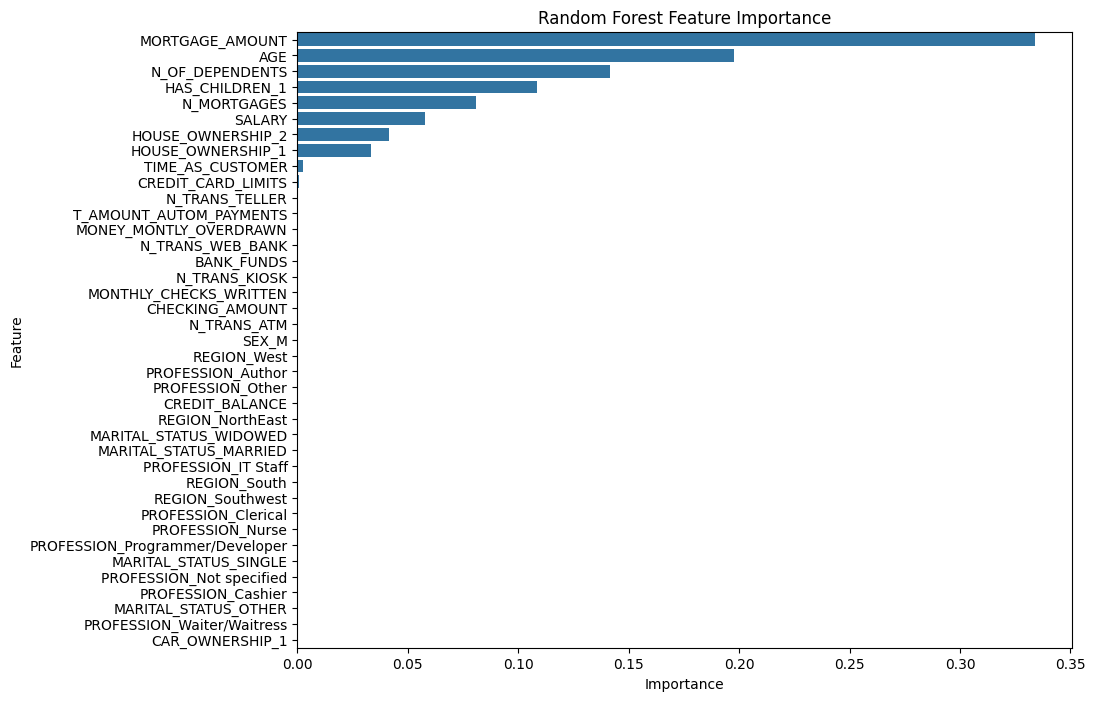

In [ ]:

importances = rf_model.feature_importances_

feature_importances_df = pd.DataFrame({
    'Feature': all_columns,
    'Importance': importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

By observing the varible importance plot, only importatnt variables to the model are MORTGAGE_AMOUNT,
AGE,
N_OF_DEPENDENTS HAS_CHILDREN_1,
_MORTGAGES,
SALARY,
HOUSE_OWNERSHIP 2,
HOUSE_OWNERSHIP_1, TIME AS CUSTOMER.T Using them only and refiting the model

In [ ]:
#selected categorical and numerical variables
cat_sel=['HAS_CHILDREN','HOUSE_OWNERSHIP']
quant_sel=['MORTGAGE_AMOUNT', 'AGE', 'N_OF_DEPENDENTS','N_MORTGAGES', 'SALARY','TIME_AS_CUSTOMER']

In [ ]:
#scaling adn encodeing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse=False))
])

quantitative_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor2 = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, cat_sel),
        ('num', quantitative_transformer, quant_sel)
    ]
)


In [ ]:
 X_train_transformed_sel = preprocessor2.fit_transform(X_train)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_test_transformed_sel = preprocessor2.fit_transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_test_transformed_sel.shape,X_train_transformed_sel.shape

((2760, 9), (11037, 9))

In [ ]:
X_test_transformed_sel[1]

array([ 0.        ,  0.        ,  0.        , -0.68817077, -0.9781118 ,
        0.56322969, -1.58839454,  0.0210621 ,  0.39818008])

In [ ]:
cat_columns = preprocessor2.named_transformers_['cat']['onehot'].get_feature_names_out(cat_sel)
all_columns_sel = list(cat_columns) + quant_sel
all_columns_sel

['HAS_CHILDREN_1',
 'HOUSE_OWNERSHIP_1',
 'HOUSE_OWNERSHIP_2',
 'MORTGAGE_AMOUNT',
 'AGE',
 'N_OF_DEPENDENTS',
 'N_MORTGAGES',
 'SALARY',
 'TIME_AS_CUSTOMER']

In [ ]:
## refitting th rf model
rf_model_sel = RandomForestRegressor(n_estimators=100, random_state=100)
rf_model_sel.fit(X_train_transformed_sel, y_train)

RandomForestRegressor(random_state=100)

In [ ]:
#model evaluation
y_pred_train_rf_sel = rf_model_sel.predict(X_train_transformed_sel)
y_pred_test_rf_sel = rf_model_sel.predict(X_test_transformed_sel)

MSE_rf_train_sel = mean_squared_error(y_train, y_pred_train_rf_sel)
RMSE_rf_train_sel = np.sqrt(MSE_rf_train_sel)
r_rf_train_sel = r2_score(y_train, y_pred_train_rf_sel)

MSE_rf_test_sel = mean_squared_error(y_test, y_pred_test_rf_sel)
RMSE_rf_test_sel = np.sqrt(MSE_rf_test_sel)
r_rf_test_sel = r2_score(y_test, y_pred_test_rf_sel)

# Print performance metrics
print("Random Forest Regressor:")
print("Training MSE:", MSE_rf_train_sel)
print("Training RMSE:", RMSE_rf_train_sel)
print("Training R²:", r_rf_train_sel)
print("Test MSE:", MSE_rf_test_sel)
print("Test RMSE:", RMSE_rf_test_sel)
print("Test R²:", r_rf_test_sel)

Random Forest Regressor:
Training MSE: 24179.20900689725
Training RMSE: 155.49665271926997
Training R²: 0.9994643690518347
Test MSE: 154335.08083159188
Test RMSE: 392.8550379358675
Test R²: 0.9965079479371662


<ipython-input-74-72a61174ecd3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances_df_sel, palette='viridis')


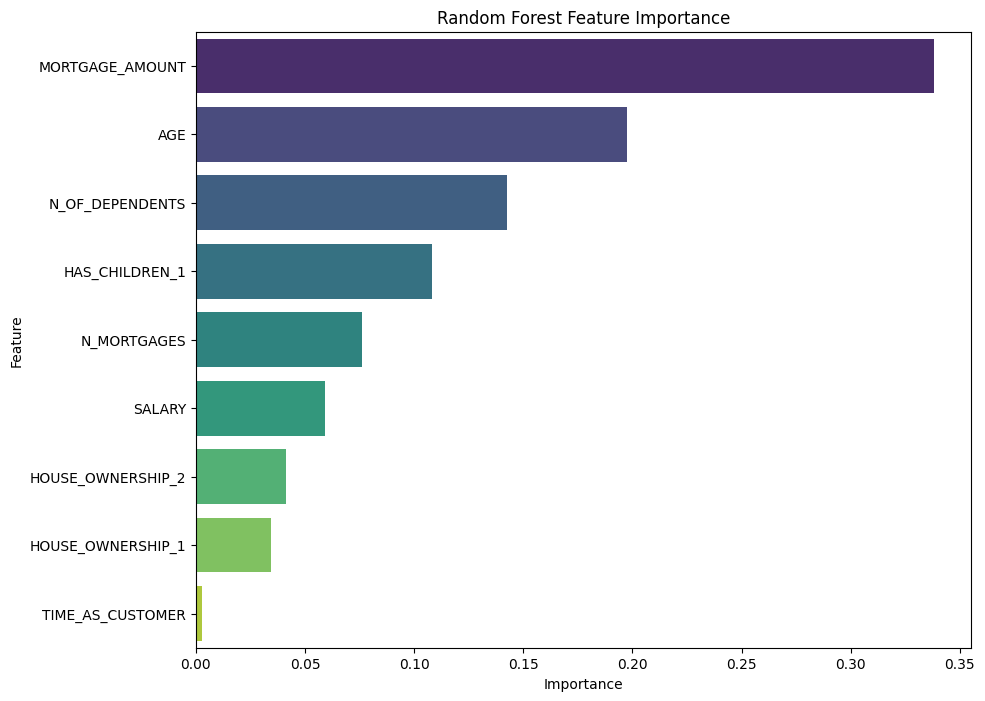

In [ ]:
#variable importance for updated Random forest
importances_sel = rf_model_sel.feature_importances_

feature_importances_df_sel = pd.DataFrame({
    'Feature': all_columns_sel,
    'Importance': importances_sel
})

feature_importances_df_sel = feature_importances_df_sel.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df_sel, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
#saving model as pickel fole
import pickle
with open('rf_model_sel.pickle', 'wb') as file:
    pickle.dump(rf_model_sel, file)

In [ ]:
rf_model_sel.predict([[ 0 , 0   ,  0    , -0.68817077, -0.9781118 ,0.56322969, -1.58839454,  0.0210621 ,  0.39818008]])

array([14084.7375])

In [ ]:
#download model
from google.colab import files
files.download('rf_model_sel.pickle')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#load saved model
import pickle
with open('rf_model_sel.pickle', 'rb') as file:
    rf_model_sel1 = pickle.load(file)

In [ ]:
import sys
print(sys.version)


3.10.12 (main, Jul 29 2024, 16:56:48) [GCC 11.4.0]


In [ ]:
import sklearn
print(sklearn.__version__)


1.3.2


In [ ]:
rf_model_sel1.predict([[ 0 , 0   ,  0    , 233, 2323 ,2323, 353,  234 ,  2342]])

array([32039.115])

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 4.3 MB/s eta 0:00:00


In [ ]:
#Partial depenency for variablez
import shap
explainer = shap.TreeExplainer(rf_model_sel)
shap_values = explainer.shap_values(X_test_transformed_sel)

KeyboardInterrupt: 

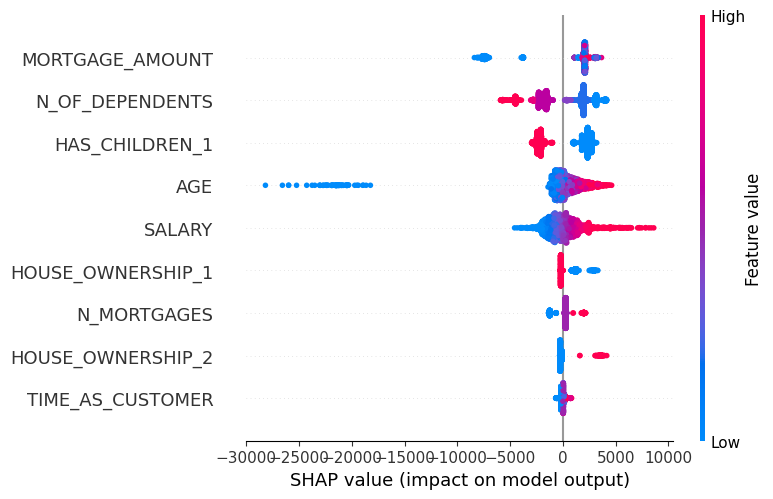

In [ ]:
#shap beeswam plot
shap.summary_plot(shap_values, X_test_transformed_sel, feature_names=all_columns_sel)

In [ ]:
X_train_transformed_df = pd.DataFrame(X_train_transformed_sel, columns=all_columns_sel)

X_train_transformed_df.head()

,HAS_CHILDREN_1,HOUSE_OWNERSHIP_1,HOUSE_OWNERSHIP_2,MORTGAGE_AMOUNT,AGE,N_OF_DEPENDENTS,N_MORTGAGES,SALARY,TIME_AS_CUSTOMER
0,1.0,0.0,0.0,-0.674705,0.736528,-1.322602,-1.562585,-0.746240,-0.351521
1,0.0,1.0,0.0,-0.571699,-1.194299,0.619337,0.393659,-0.821662,0.449912
2,0.0,1.0,0.0,0.698705,0.115905,-0.027976,0.393659,-1.289984,-0.351521
3,1.0,1.0,0.0,1.042057,0.391737,-0.675289,0.393659,0.122340,-1.152955
4,1.0,1.0,0.0,-0.468693,-0.159928,-0.675289,0.393659,0.041859,-1.152955


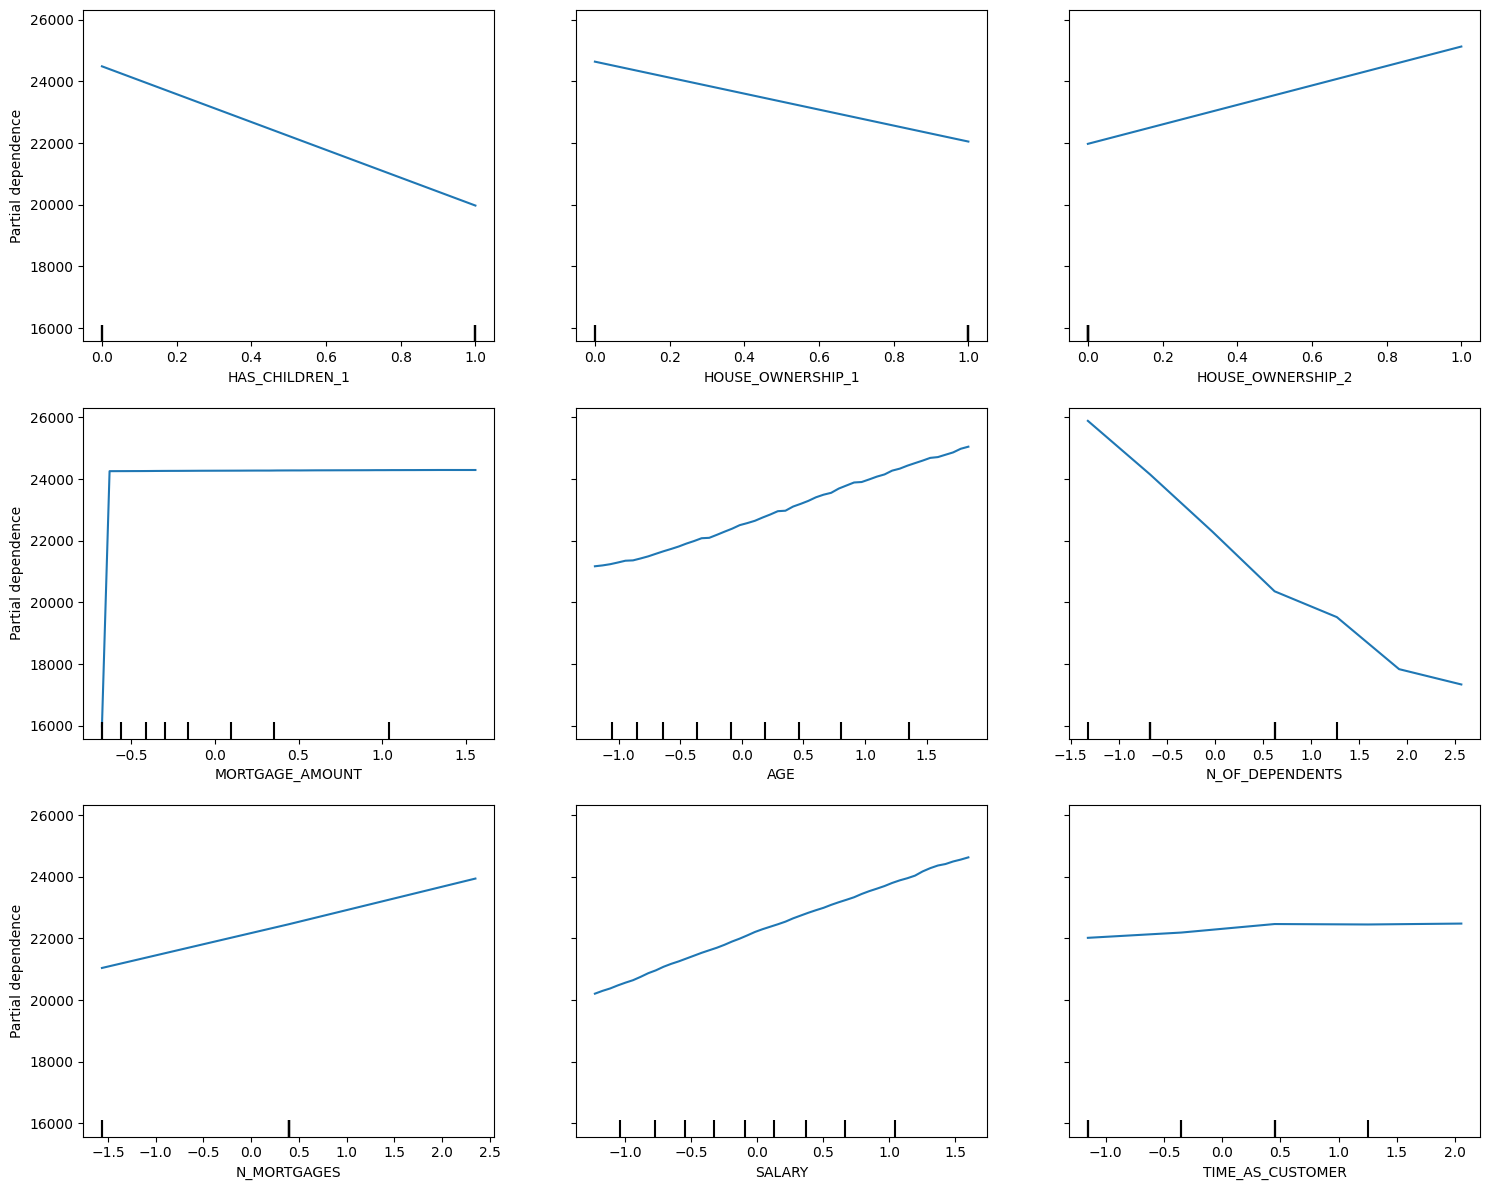

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

features = list(range(X_train_transformed_df.shape[1]))

fig, ax = plt.subplots(figsize=(15, 12))
PartialDependenceDisplay.from_estimator(rf_model_sel, X_train_transformed_df, features, ax=ax, grid_resolution=50)

plt.tight_layout()
plt.show()